# Detección de oportunidades comerciales con EFTA.

El siguiente análisis pretende identificar si hay conincidencias, a nivel de subpartidas, entre el aumento de exportaciones del MERCOSUR al mundo y el aumento de importaciones de EFTA desde el MUNDO. La tasa de incremento será medida con la TAAC (tasa de acumulación anual compuesta). El período de tiempo analizado es 2013-2016

Si existen coincidencias se procederá a identificar el arancel ad-valorem registrado por EFTA, si el mismo es positivo dichas subpartidas serán candidatas a ser seleccionadas para una lista de pedidos del MERCOSUR en el marco de la negociacón de un tratado de libre comercio. Si por el contrario el arancel ya es cero, pero no se registra comercio con la contraparte, los sectores que engloben dichas subpartidas serían seleccionados para planes de promoción comercial.

### Precodigo:
1. Importar los datasets de importaciones de EFTA desde el mundo y exportaciones de MCS hacia el mundo.
- Arreglar los codigos de las subpartidas para que queden expresadas en seis digitios, aún cuando comiencen con cero.
- Chequear que los tipos de cada variable sean los correctos. Que el tipo los codigos de subpartidas sean objetc.
- Calcular, para cada subpartida, el dato agregado por EFTA y MCS. (podría expresar los paises en columnas, sumar a nivel de - subpartida y que esa variable nueva se llame MCS/EFTA)
- Abrir los años por columnas para poder calcular la TAAC.
- Unir los dataframes resultantes.
- Crear nuevo dataframe que por cada subpartida indique el valor de TAAC para Impo EFTA mundo y Expo MCS mundo. (Matriz TAAC)
- Agregar al anterior DF los labels de GG1 y GG2
- Gráficar un scatter para ver las coincidencias. (MCS-EFTA) (Socios MCS-EFTA) (ARG-EFTA) (ARG-Socios EFTA)
- Agergar al DF de TAAC los datos de aranceles y exportaciones promedio ARG y MCS ´13-´16.
- Crear dos dataframes que agrupen las Subpartidas con coincidencias de primer cuadrante del scatter y que por un lado tengan arancel mayor a 5 y que EFTA importa más de algun valor de umbral, por otro lado aquellas subpartidas cuyo arancel es cero, argentina exporta al mundo más de determinado umbral, no importamos a EFTA (verlo por socio) y EFTA si importa del mundo. 





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importo los csv con los datos de importaciones de EFTA al mundo y exportaciones de EFTA desde el mundo. 

In [2]:
impo_EFTA = pd.read_csv("M_EFTA_MDO.csv", encoding = "latin1")
expo_MCS = pd.read_csv("X_MCS_MDO.csv", encoding = "latin1")

In [3]:
impo_EFTA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20019 entries, 0 to 20018
Data columns (total 13 columns):
Nomenclature          20019 non-null object
ReporterISO3          20019 non-null object
ProductCode           20019 non-null int64
ProductDescription    20019 non-null object
ReporterName          20019 non-null object
PartnerISO3           20019 non-null object
PartnerName           20019 non-null object
TradeFlowName         20019 non-null object
TradeFlowCode         20019 non-null int64
2013 in 1000 USD      19315 non-null float64
2014 in 1000 USD      19377 non-null float64
2015 in 1000 USD      19427 non-null float64
2016 in 1000 USD      19499 non-null float64
dtypes: float64(4), int64(2), object(7)
memory usage: 1.5+ MB


In [4]:
expo_MCS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18667 entries, 0 to 18666
Data columns (total 13 columns):
Nomenclature          18667 non-null object
ReporterISO3          18667 non-null object
ProductCode           18667 non-null int64
ProductDescription    18667 non-null object
ReporterName          18667 non-null object
PartnerISO3           18667 non-null object
PartnerName           18667 non-null object
TradeFlowName         18667 non-null object
TradeFlowCode         18667 non-null int64
2013 in 1000 USD      15902 non-null float64
2014 in 1000 USD      15832 non-null float64
2015 in 1000 USD      15971 non-null float64
2016 in 1000 USD      15928 non-null float64
dtypes: float64(4), int64(2), object(7)
memory usage: 1.4+ MB


In [5]:
print (impo_EFTA.shape, expo_MCS.shape)

(20019, 13) (18667, 13)


In [6]:
impo_EFTA.head()

,Nomenclature,ReporterISO3,ProductCode,ProductDescription,ReporterName,PartnerISO3,PartnerName,TradeFlowName,TradeFlowCode,2013 in 1000 USD,2014 in 1000 USD,2015 in 1000 USD,2016 in 1000 USD
0,H4,CHE,10121,-- Pure-bred breeding animals,Switzerland,WLD,World,Import,5,8546.392,1072.727,2720.646,3583.971
1,H4,CHE,10129,-- Other,Switzerland,WLD,World,Import,5,61079.444,66015.663,58564.122,55535.094
2,H4,CHE,10130,- Asses,Switzerland,WLD,World,Import,5,32.191,39.394,41.158,48.729
3,H4,CHE,10190,- Other,Switzerland,WLD,World,Import,5,5.050,22.395,21.587,30.347
4,H4,CHE,10221,-- Pure-bred breeding animals,Switzerland,WLD,World,Import,5,3000.387,2822.913,2413.417,3299.275


In [7]:
expo_MCS.head()

,Nomenclature,ReporterISO3,ProductCode,ProductDescription,ReporterName,PartnerISO3,PartnerName,TradeFlowName,TradeFlowCode,2013 in 1000 USD,2014 in 1000 USD,2015 in 1000 USD,2016 in 1000 USD
0,H4,ARG,10121,-- Pure-bred breeding animals,Argentina,WLD,World,Export,6,2042.839,2136.042,1492.760,3495.044
1,H4,ARG,10129,-- Other,Argentina,WLD,World,Export,6,13311.737,17121.944,15062.198,27705.416
2,H4,ARG,10221,-- Pure-bred breeding animals,Argentina,WLD,World,Export,6,420.343,1169.609,688.815,864.094
3,H4,ARG,10229,-- Other,Argentina,WLD,World,Export,6,195.505,399.282,41.746,6.512
4,H4,ARG,10392,-- Weighing 50 kg or more,Argentina,WLD,World,Export,6,NaN,93.190,116.792,23.130


In [8]:
# Elimino variables que no son relevantes para el análisis
expo_MCS.drop(columns=["Nomenclature", "ReporterISO3", "PartnerISO3", "TradeFlowCode"], inplace = True)

In [9]:
expo_MCS.head()

,ProductCode,ProductDescription,ReporterName,PartnerName,TradeFlowName,2013 in 1000 USD,2014 in 1000 USD,2015 in 1000 USD,2016 in 1000 USD
0,10121,-- Pure-bred breeding animals,Argentina,World,Export,2042.839,2136.042,1492.760,3495.044
1,10129,-- Other,Argentina,World,Export,13311.737,17121.944,15062.198,27705.416
2,10221,-- Pure-bred breeding animals,Argentina,World,Export,420.343,1169.609,688.815,864.094
3,10229,-- Other,Argentina,World,Export,195.505,399.282,41.746,6.512
4,10392,-- Weighing 50 kg or more,Argentina,World,Export,NaN,93.190,116.792,23.130


Elimino variables que no son relevantes para el análisis

In [10]:
impo_EFTA.drop(columns=["Nomenclature", "ReporterISO3", "PartnerISO3", "TradeFlowCode"], inplace = True)

In [11]:
impo_EFTA.columns

Index(['ProductCode', 'ProductDescription', 'ReporterName', 'PartnerName',
       'TradeFlowName', '2013 in 1000 USD ', '2014 in 1000 USD ',
       '2015 in 1000 USD ', '2016 in 1000 USD '],
      dtype='object')

Tengo que castear las variables de modo correcto. ProductCode tienen que ser object, no int o float. 

In [12]:
impo_EFTA["ProductCode"] = impo_EFTA["ProductCode"].apply(str)

In [13]:
impo_EFTA.dtypes

ProductCode            object
ProductDescription     object
ReporterName           object
PartnerName            object
TradeFlowName          object
2013 in 1000 USD      float64
2014 in 1000 USD      float64
2015 in 1000 USD      float64
2016 in 1000 USD      float64
dtype: object

In [14]:
expo_MCS["ProductCode"] = expo_MCS["ProductCode"].apply(str)

In [15]:
expo_MCS.dtypes

ProductCode            object
ProductDescription     object
ReporterName           object
PartnerName            object
TradeFlowName          object
2013 in 1000 USD      float64
2014 in 1000 USD      float64
2015 in 1000 USD      float64
2016 in 1000 USD      float64
dtype: object

Lo siguiente es agregar el "Cero" que falta adelante del codigo de subpartida para que todo quede con la misma cantidad de dígitos.

In [16]:
impo_EFTA["ProductCode"] = impo_EFTA["ProductCode"].apply(lambda x : "0" + x if len(x) <= 5 else x)
impo_EFTA.head()

,ProductCode,ProductDescription,ReporterName,PartnerName,TradeFlowName,2013 in 1000 USD,2014 in 1000 USD,2015 in 1000 USD,2016 in 1000 USD
0,010121,-- Pure-bred breeding animals,Switzerland,World,Import,8546.392,1072.727,2720.646,3583.971
1,010129,-- Other,Switzerland,World,Import,61079.444,66015.663,58564.122,55535.094
2,010130,- Asses,Switzerland,World,Import,32.191,39.394,41.158,48.729
3,010190,- Other,Switzerland,World,Import,5.050,22.395,21.587,30.347
4,010221,-- Pure-bred breeding animals,Switzerland,World,Import,3000.387,2822.913,2413.417,3299.275


In [17]:
expo_MCS["ProductCode"] = expo_MCS["ProductCode"].apply(lambda x : "0" + x if len(x) <= 5 else x)
expo_MCS.head()

,ProductCode,ProductDescription,ReporterName,PartnerName,TradeFlowName,2013 in 1000 USD,2014 in 1000 USD,2015 in 1000 USD,2016 in 1000 USD
0,010121,-- Pure-bred breeding animals,Argentina,World,Export,2042.839,2136.042,1492.760,3495.044
1,010129,-- Other,Argentina,World,Export,13311.737,17121.944,15062.198,27705.416
2,010221,-- Pure-bred breeding animals,Argentina,World,Export,420.343,1169.609,688.815,864.094
3,010229,-- Other,Argentina,World,Export,195.505,399.282,41.746,6.512
4,010392,-- Weighing 50 kg or more,Argentina,World,Export,NaN,93.190,116.792,23.130


Cambio el nombre de las variables año para que queden expresadas de un modo más simple de trabajar. 

In [18]:
expo_MCS.columns = ['ProductCode', 'ProductDescription', 'ReporterName', 'PartnerName',
       'TradeFlowName', '2013', '2014',
       '2015', '2016']

In [19]:
impo_EFTA.columns = ['ProductCode', 'ProductDescription', 'ReporterName', 'PartnerName',
       'TradeFlowName', '2013', '2014',
       '2015', '2016']

In [20]:
print (expo_MCS.columns, impo_EFTA.columns)

Index(['ProductCode', 'ProductDescription', 'ReporterName', 'PartnerName',
       'TradeFlowName', '2013', '2014', '2015', '2016'],
      dtype='object') Index(['ProductCode', 'ProductDescription', 'ReporterName', 'PartnerName',
       'TradeFlowName', '2013', '2014', '2015', '2016'],
      dtype='object')


## Revisar variables categóricas

Primero tengo que cerciorarme de que están todos lo paises que serán analizados y a su vez que estén definidos los montos de impo total EFTA y expo total del MCS.

In [21]:
print (expo_MCS["ReporterName"].unique()); print (impo_EFTA["ReporterName"].unique())

['Argentina' 'Brazil' 'Paises socios del MERCOSUR --- MERC' 'Paraguay'
 'Uruguay']
['Switzerland' 'Paises miembros del EFTA --- EFTA  ' 'Iceland' 'Norway']


Renombro las variables de EFTA y MERCOSUR para que sean más faciles de leer.

In [22]:
impo_EFTA["ReporterName"] = impo_EFTA["ReporterName"].replace({"Paises miembros del EFTA --- EFTA  " : "EFTA"})
expo_MCS["ReporterName"] = expo_MCS["ReporterName"].replace({"Paises socios del MERCOSUR --- MERC" : "MERCOSUR"})

In [23]:
print (expo_MCS["ReporterName"].unique()); print (impo_EFTA["ReporterName"].unique())

['Argentina' 'Brazil' 'MERCOSUR' 'Paraguay' 'Uruguay']
['Switzerland' 'EFTA' 'Iceland' 'Norway']


## Calculo de TAAC

Con el dataset ordenado paso a calcular las TAAC 13-16 para todos los paises y a nivel de bloques. (CAGR, Compound annual growth rate, en inglés).

Para tener una mejor lectura de las tasas convierto los NaN en 0, que es justamente el valor correspondiente.

〖TAAC 〗_((t_0,t_n))=〖((V (t_n))/(V(t_0)))〗^(1/(t_n- t_0 ))-1

In [24]:
expo_MCS.fillna(0, inplace = True)
impo_EFTA.fillna(0, inplace = True);

In [25]:
expo_MCS["TAAC_13-16"] = ((expo_MCS["2016"] / expo_MCS["2013"]) ** (1 / (2016 - 2013)) - 1)
impo_EFTA["TAAC_13-16"] = ((impo_EFTA["2016"] / impo_EFTA["2013"]) ** (1 / (2016 - 2013)) - 1)

In [26]:
impo_EFTA.head()

,ProductCode,ProductDescription,ReporterName,PartnerName,TradeFlowName,2013,2014,2015,2016,TAAC_13-16
0,010121,-- Pure-bred breeding animals,Switzerland,World,Import,8546.392,1072.727,2720.646,3583.971,-0.251496
1,010129,-- Other,Switzerland,World,Import,61079.444,66015.663,58564.122,55535.094,-0.031222
2,010130,- Asses,Switzerland,World,Import,32.191,39.394,41.158,48.729,0.148200
3,010190,- Other,Switzerland,World,Import,5.050,22.395,21.587,30.347,0.818060
4,010221,-- Pure-bred breeding animals,Switzerland,World,Import,3000.387,2822.913,2413.417,3299.275,0.032160


In [27]:
expo_MCS.head()

,ProductCode,ProductDescription,ReporterName,PartnerName,TradeFlowName,2013,2014,2015,2016,TAAC_13-16
0,010121,-- Pure-bred breeding animals,Argentina,World,Export,2042.839,2136.042,1492.760,3495.044,0.196023
1,010129,-- Other,Argentina,World,Export,13311.737,17121.944,15062.198,27705.416,0.276762
2,010221,-- Pure-bred breeding animals,Argentina,World,Export,420.343,1169.609,688.815,864.094,0.271508
3,010229,-- Other,Argentina,World,Export,195.505,399.282,41.746,6.512,-0.678250
4,010392,-- Weighing 50 kg or more,Argentina,World,Export,0.000,93.190,116.792,23.130,inf


Ahora voy a unir ambos datasets y luego tengo que expresar los datos de forma tal que cada supartida sea un registro (fila)y que las variables sean los TAAC de cada país. 

In [28]:
comercio = pd.concat([impo_EFTA, expo_MCS])
comercio.sample(10)

,ProductCode,ProductDescription,ReporterName,PartnerName,TradeFlowName,2013,2014,2015,2016,TAAC_13-16
6281,521051,-- plain weave,Brazil,World,Export,2288.959,4600.260,1915.733,347.699,-0.466434
17999,844511,-- Carding machines,Uruguay,World,Export,0.000,15.000,767.365,81.437,inf
3855,880100,"Balloons and dirigibles; gliders, h",Argentina,World,Export,0.000,45.000,0.000,0.000,NaN
2264,620412,-- of Cotton,Argentina,World,Export,0.200,0.050,0.000,0.144,-0.103719
5002,280200,"Sulphur, sublimed or precipitated;",Brazil,World,Export,4.814,6.678,0.013,0.000,-1.000000
12513,540339,-- Other,Iceland,World,Import,0.648,1.390,0.531,0.921,0.124333
17463,690410,- building bricks,Uruguay,World,Export,75.875,71.341,9.278,0.000,-1.000000
16829,401161,-- of a kind used on agricultural o,Uruguay,World,Export,6.739,0.000,0.945,3.856,-0.169804
15936,020443,-- Boneless,Uruguay,World,Export,23001.058,25134.416,14503.436,13723.653,-0.158139
19188,847230,-machines for sorting or Folding ma,Norway,World,Import,2449.224,4319.909,1406.115,1769.103,-0.102761


In [29]:
TAAC_Matrix = pd.pivot_table(comercio, index = "ProductCode", columns = "ReporterName", values = "TAAC_13-16")
TAAC_Matrix.head()

ReporterName,Argentina,Brazil,EFTA,Iceland,MERCOSUR,Norway,Paraguay,Switzerland,Uruguay
ProductCode,,,,,,,,,
010121,0.196023,0.333619,-0.240670,NaN,0.317001,-0.183047,inf,-0.251496,0.708310
010129,0.276762,0.117043,-0.045306,NaN,0.230983,-0.093439,NaN,-0.031222,-0.050244
010130,NaN,NaN,0.231680,NaN,NaN,1.475112,NaN,0.148200,NaN
010190,NaN,NaN,0.818060,NaN,NaN,NaN,NaN,0.818060,NaN
010221,0.271508,-0.588387,0.031997,NaN,0.228409,0.025107,inf,0.032160,1.776244


Ahora incorporo al nuevo df, que vincula las TAAC con cada uno de los paises/bloques, los labels de Grandes Grupos 1 (MOA, MOI, PP y C&E) junto con Grandes Grupos 2 que ofrece una noción del origen o estructura productiva subyacente de cada subpartida. 

In [30]:
labels = pd.read_excel("Labels_GG1_GG2.xlsx")
labels.head()

,NCM 2012,nivel_1,nivel_2,cod nivel_2,Nivel 2 Corto
0,10110,Productos Primarios,Animales vivos,101,Animales vivos
1,10111,Productos Primarios,Animales vivos,101,Animales vivos
2,10119,Productos Primarios,Animales vivos,101,Animales vivos
3,10120,Productos Primarios,Animales vivos,101,Animales vivos
4,10121,Productos Primarios,Animales vivos,101,Animales vivos


Dropeo las columnas que no sirven (cod nivel_2 y nivel_2)

In [31]:
labels.drop(columns = ['cod nivel_2', 'nivel_2'], inplace = True)
labels.head()

,NCM 2012,nivel_1,Nivel 2 Corto
0,10110,Productos Primarios,Animales vivos
1,10111,Productos Primarios,Animales vivos
2,10119,Productos Primarios,Animales vivos
3,10120,Productos Primarios,Animales vivos
4,10121,Productos Primarios,Animales vivos


Cambio el nombre de las variables por algo más facil de manejar y chequeo el tipo de objeto

In [32]:
labels.columns = ["ProductCode", "GG1", "GG2"]
labels.dtypes

ProductCode     int64
GG1            object
GG2            object
dtype: object

Casteo a ProductCode como string

In [33]:
labels["ProductCode"] = labels["ProductCode"].apply(str)
labels.dtypes

ProductCode    object
GG1            object
GG2            object
dtype: object

Agrego el cero que está faltando adelante de las subpartidas que tienen 5 digitos.

In [34]:
labels["ProductCode"] = labels["ProductCode"].apply(lambda x : "0" + x if len(x) <= 5 else x)
labels.sample(5)

,ProductCode,GG1,GG2
1259,271290,Combustibles y Energía,Resto de combustibles
5508,852321,MOI,Aparatos eléctricos
6017,903083,MOI,Otros Industriales
5563,852830,MOI,Aparatos eléctricos
3822,650692,MOI,Otros Industriales


Ahora hago el merge con la matriz de TAAC para poder tener identificado en cada subpartida cual es su procedencia productiva

In [35]:
TAAC_Matrix = pd.merge(left = labels, right = TAAC_Matrix, on = "ProductCode")
TAAC_Matrix.head()

,ProductCode,GG1,GG2,Argentina,Brazil,EFTA,Iceland,MERCOSUR,Norway,Paraguay,Switzerland,Uruguay
0,010121,Productos Primarios,Animales vivos,0.196023,0.333619,-0.240670,NaN,0.317001,-0.183047,inf,-0.251496,0.708310
1,010129,Productos Primarios,Animales vivos,0.276762,0.117043,-0.045306,NaN,0.230983,-0.093439,NaN,-0.031222,-0.050244
2,010130,Productos Primarios,Animales vivos,NaN,NaN,0.231680,NaN,NaN,1.475112,NaN,0.148200,NaN
3,010190,Productos Primarios,Animales vivos,NaN,NaN,0.818060,NaN,NaN,NaN,NaN,0.818060,NaN
4,010221,Productos Primarios,Animales vivos,0.271508,-0.588387,0.031997,NaN,0.228409,0.025107,inf,0.032160,1.776244


Verifico que todas las subpartidas tengan asignadas GG1 y GG2. (Ojo que acá funcionó sin definir que haga el merge con how = right ya que hay más supartidas en el df de labels que en el de la matriz TAAC y por default es "inner")

In [36]:
TAAC_Matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5182 entries, 0 to 5181
Data columns (total 12 columns):
ProductCode    5182 non-null object
GG1            5182 non-null object
GG2            5182 non-null object
Argentina      3999 non-null float64
Brazil         4587 non-null float64
EFTA           5159 non-null float64
Iceland        4583 non-null float64
MERCOSUR       4781 non-null float64
Norway         4928 non-null float64
Paraguay       1767 non-null float64
Switzerland    5127 non-null float64
Uruguay        2363 non-null float64
dtypes: float64(9), object(3)
memory usage: 465.6+ KB


## Correlaciones

Estudio brevemente cuales son las correlaciones entre las TAAC a nivel de paises.

In [37]:
TAAC_Matrix["GG1"].unique()

array(['Productos Primarios', 'MOA', 'MOI', 'Combustibles y Energía'],
      dtype=object)

In [38]:
TAAC_correlaciones_MCS_EFTA = TAAC_Matrix[["MERCOSUR", "EFTA"]].corr()
TAAC_correlaciones_MCS_EFTA

,MERCOSUR,EFTA
MERCOSUR,1.000000,-0.007592
EFTA,-0.007592,1.000000


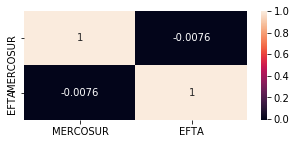

In [39]:
plt.figure(figsize = (5,2))
sns.heatmap(TAAC_correlaciones_MCS_EFTA, annot=True);
plt.show()

In [40]:
TAAC_correlaciones = TAAC_Matrix.corr()
TAAC_correlaciones_PP = TAAC_Matrix[TAAC_Matrix["GG1"] == "Productos Primarios"].corr()
TAAC_correlaciones_MOA = TAAC_Matrix[TAAC_Matrix["GG1"] == "MOA"].corr()
TAAC_correlaciones_MOI = TAAC_Matrix[TAAC_Matrix["GG1"] == "MOI"].corr()
TAAC_correlaciones_CE = TAAC_Matrix[TAAC_Matrix["GG1"] == "Combustibles y Energía"].corr()

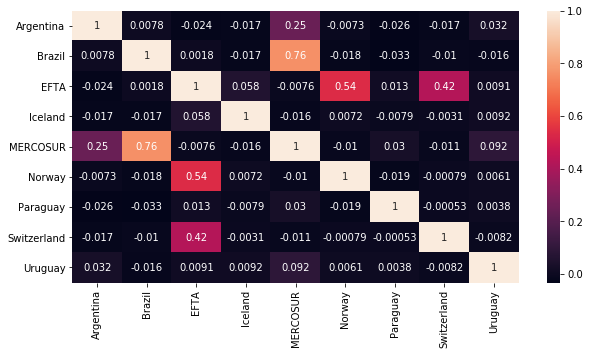

In [41]:
plt.figure(figsize = (10,5))
sns.heatmap(TAAC_correlaciones, annot=True);
plt.show()

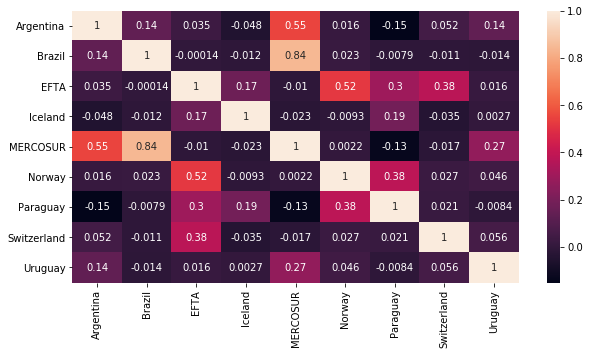

In [42]:
plt.figure(figsize = (10,5))
sns.heatmap(TAAC_correlaciones_PP, annot=True);
plt.show()

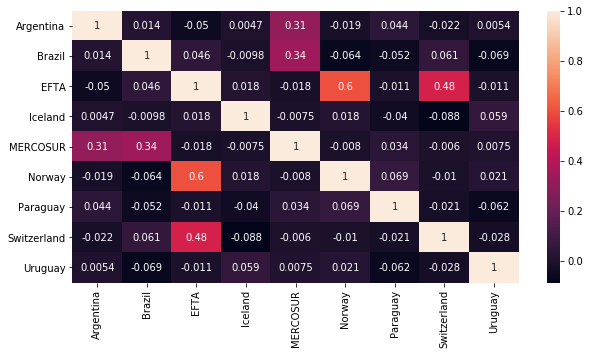

In [43]:
plt.figure(figsize = (10,5))
sns.heatmap(TAAC_correlaciones_MOA, annot=True);
plt.show()

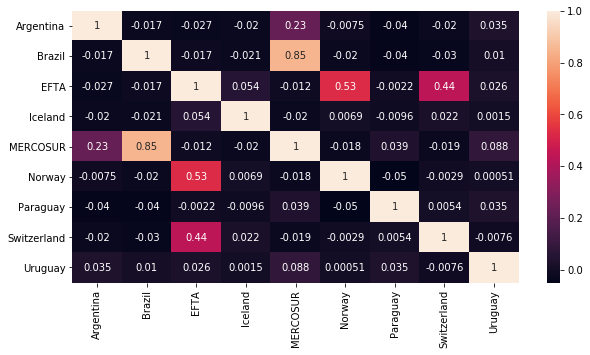

In [44]:
plt.figure(figsize = (10,5))
sns.heatmap(TAAC_correlaciones_MOI, annot=True);
plt.show()

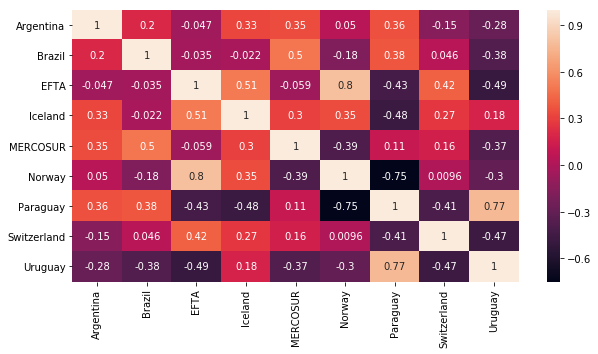

In [45]:
plt.figure(figsize = (10,5))
sns.heatmap(TAAC_correlaciones_CE, annot=True);
plt.show()

## Análisis de la Matriz de TAAC

In [46]:
TAAC_Matrix.describe()

,Argentina,Brazil,EFTA,Iceland,MERCOSUR,Norway,Paraguay,Switzerland,Uruguay
count,3999.000000,4587.000000,5159.000000,4583.000000,4781.000000,4928.000000,1767.000000,5127.000000,2363.000000
mean,inf,inf,inf,inf,inf,inf,inf,inf,inf
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.412528,-0.212258,-0.116414,-0.115203,-0.224395,-0.170031,-0.569811,-0.111939,-0.574745
50%,-0.169999,-0.050887,-0.046187,0.055664,-0.076026,-0.063582,0.092407,-0.039389,-0.024532
75%,0.053790,0.170916,0.021711,0.280588,0.097998,0.043764,inf,0.033287,1.934185
max,inf,inf,inf,inf,inf,inf,inf,inf,inf


In [47]:
TAAC_Matrix[(TAAC_Matrix["MERCOSUR"].notnull()) & (TAAC_Matrix["EFTA"].notnull())].describe()

,Argentina,Brazil,EFTA,Iceland,MERCOSUR,Norway,Paraguay,Switzerland,Uruguay
count,3995.000000,4576.000000,4770.000000,4374.000000,4770.000000,4617.000000,1767.000000,4757.000000,2362.000000
mean,inf,inf,inf,inf,inf,inf,inf,inf,inf
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.411087,-0.211684,-0.114040,-0.108507,-0.223957,-0.164847,-0.569811,-0.108743,-0.573801
50%,-0.169912,-0.050611,-0.047082,0.055667,-0.075882,-0.064614,0.092407,-0.039756,-0.024309
75%,0.054059,0.170773,0.016967,0.267243,0.097618,0.036662,inf,0.029273,1.934990
max,inf,inf,inf,inf,inf,inf,inf,inf,inf


In [48]:
TAAC_Matrix[(TAAC_Matrix["MERCOSUR"] > 0) & (TAAC_Matrix["EFTA"] > 0)].describe()

C:\Users\cjy\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:4406: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


,Argentina,Brazil,EFTA,Iceland,MERCOSUR,Norway,Paraguay,Switzerland,Uruguay
count,458.000000,570.000000,603.000000,532.000000,603.000000,577.000000,193.000000,600.000000,250.000000
mean,inf,inf,inf,inf,inf,inf,inf,inf,inf
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.000000,-1.000000,0.000282,-1.000000,0.000018,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.276869,0.072583,0.034587,-0.061762,0.073719,-0.059349,-0.385646,0.027166,-0.553543
50%,0.020307,0.248411,0.080237,0.104919,0.255000,0.041517,0.440326,0.085948,0.084559
75%,0.428734,1.117704,0.175164,0.361178,0.928653,0.177433,NaN,0.187206,3.331447
max,inf,inf,inf,inf,inf,inf,inf,inf,inf


## Análisis visual de TAAC exportaciones e importaciones

Se puede observar que hay una serie de supartidas donde hay conincidencias en el primer cuadrante del scatter. Estas relaciones positivas hablan de que para todas estas subpartidas las importaciones del EFTA desde el mundo aumentaron asi como tambien las exportaciones del MERCOSUR hacia el mundo. 

In [49]:
import seaborn as sns; sns.set()

In [50]:
TAAC_Matrix.columns

Index(['ProductCode', 'GG1', 'GG2', 'Argentina', 'Brazil', 'EFTA', 'Iceland',
       'MERCOSUR', 'Norway', 'Paraguay', 'Switzerland', 'Uruguay'],
      dtype='object')

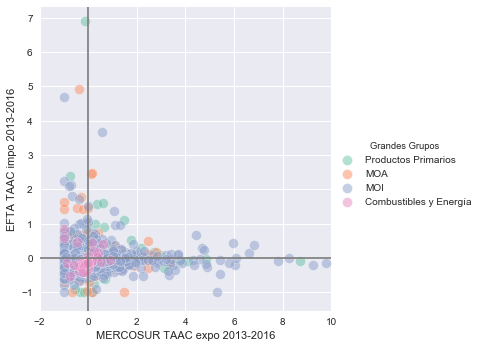

In [51]:
FG = sns.FacetGrid(TAAC_Matrix, hue = "GG1", palette = "Set2", size = 5, xlim = (-2 , 10))
FG.map(plt.scatter, "MERCOSUR", "EFTA", s=100, linewidth=.50, edgecolor="white", alpha = 0.5)
FG.add_legend(title = "Grandes Grupos")
FG.set(xlabel="MERCOSUR TAAC expo 2013-2016", ylabel="EFTA TAAC impo 2013-2016")
plt.axvline(0, color = "gray")
plt.axhline(0, color = "gray");

En los siguientes plots quiero ver que tan fuertes son estas relaciones para entre cada uno de los socios de MERCOSUR con cada uno de los estados miembros del EFTA.

Se puede observar a simple vista como los segmentos de relaciones positivas se replica en todos los socios del MERCOSUR con EFTA. Dicho esto parece ser que la nube de puntos positivos coincidentes es mas densa en el caso de Argentina y Brasil comparada con Uruguay y Paraguay. 

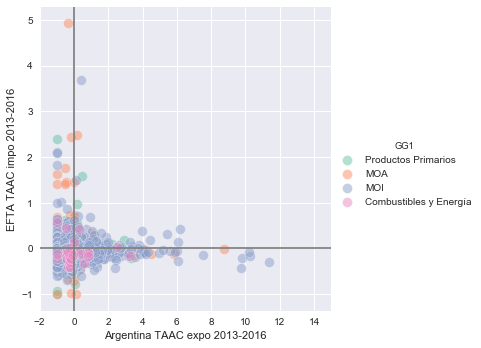

In [52]:
# gráfico que muestra la relación Argentina-EFTA
FG = sns.FacetGrid(TAAC_Matrix, hue = "GG1", palette = "Set2", size = 5, xlim = (-2 , 15))
FG.map(plt.scatter, "Argentina", "EFTA", s=100, linewidth=.50, edgecolor="white", alpha = 0.5)
FG.add_legend()
FG.set(xlabel="Argentina TAAC expo 2013-2016", ylabel="EFTA TAAC impo 2013-2016")
plt.axvline(0, color = "gray")
plt.axhline(0, color = "gray");

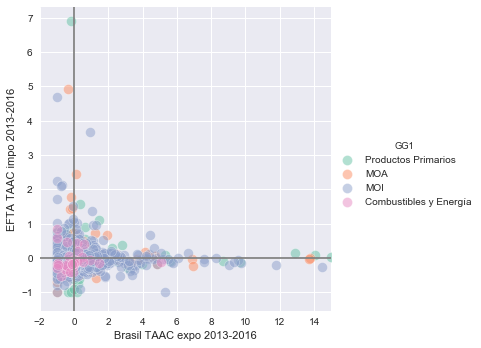

In [53]:
# gráfico que muestra la relación Brasil-EFTA
FG = sns.FacetGrid(TAAC_Matrix, hue = "GG1", palette = "Set2", size = 5, xlim = (-2 , 15))
FG.map(plt.scatter, "Brazil", "EFTA", s=100, linewidth=.50, edgecolor="white", alpha = 0.5)
FG.add_legend()
FG.set(xlabel="Brasil TAAC expo 2013-2016", ylabel="EFTA TAAC impo 2013-2016")
plt.axvline(0, color = "gray")
plt.axhline(0, color = "gray");

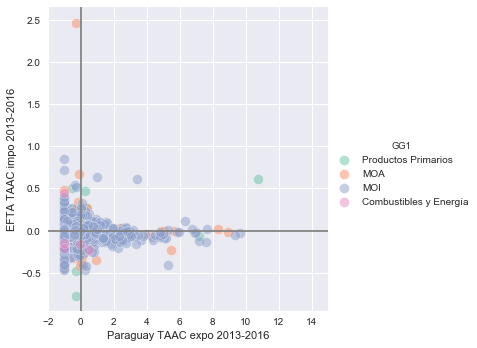

In [54]:
# gráfico que muestra la relación Paraguay-EFTA
FG = sns.FacetGrid(TAAC_Matrix, hue = "GG1", palette = "Set2", size = 5, xlim = (-2 , 15))
FG.map(plt.scatter, "Paraguay", "EFTA", s=100, linewidth=.50, edgecolor="white", alpha = 0.5)
FG.add_legend()
FG.set(xlabel="Paraguay TAAC expo 2013-2016", ylabel="EFTA TAAC impo 2013-2016")
plt.axvline(0, color = "gray")
plt.axhline(0, color = "gray");

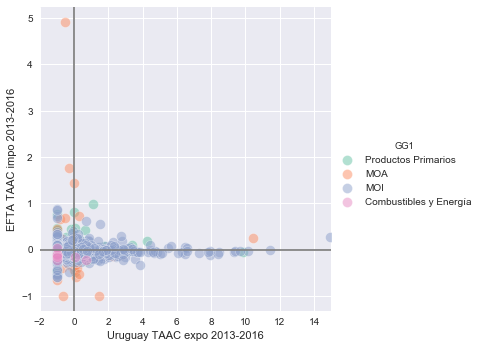

In [55]:
# gráfico que muestra la relación Uruguay-EFTA
FG = sns.FacetGrid(TAAC_Matrix, hue = "GG1", palette = "Set2", size = 5, xlim = (-2 , 15))
FG.map(plt.scatter, "Uruguay", "EFTA", s=100, linewidth=.50, edgecolor="white", alpha = 0.5)
FG.add_legend()
FG.set(xlabel="Uruguay TAAC expo 2013-2016", ylabel="EFTA TAAC impo 2013-2016")
plt.axvline(0, color = "gray")
plt.axhline(0, color = "gray");

Ahora quiero ver cuales son las coincidencias entre Argentina y los distintos socios del EFTA

In [56]:
TAAC_Matrix.columns

Index(['ProductCode', 'GG1', 'GG2', 'Argentina', 'Brazil', 'EFTA', 'Iceland',
       'MERCOSUR', 'Norway', 'Paraguay', 'Switzerland', 'Uruguay'],
      dtype='object')

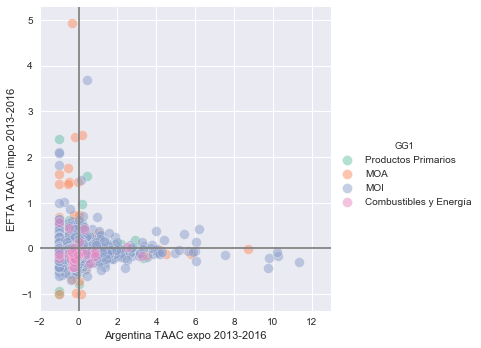

In [57]:
# gráfico que muestra la relación Argentina-EFTA
FG = sns.FacetGrid(TAAC_Matrix, hue = "GG1", palette = "Set2", size = 5, xlim = (-2 , 13))
FG.map(plt.scatter, "Argentina", "EFTA", s=100, linewidth=.50, edgecolor="white", alpha = 0.5)
FG.add_legend()
FG.set(xlabel="Argentina TAAC expo 2013-2016", ylabel="EFTA TAAC impo 2013-2016")
plt.axvline(0, color = "gray")
plt.axhline(0, color = "gray");

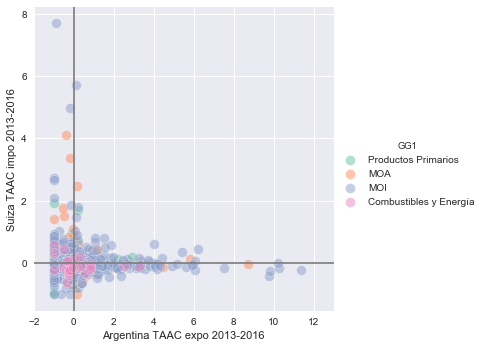

In [58]:
# gráfico que muestra la relación Argentina-Suiza
FG = sns.FacetGrid(TAAC_Matrix, hue = "GG1", palette = "Set2", size = 5, xlim = (-2 , 13))
FG.map(plt.scatter, "Argentina", "Switzerland", s=100, linewidth=.50, edgecolor="white", alpha = 0.5)
FG.add_legend()
FG.set(xlabel="Argentina TAAC expo 2013-2016", ylabel="Suiza TAAC impo 2013-2016")
plt.axvline(0, color = "gray")
plt.axhline(0, color = "gray");

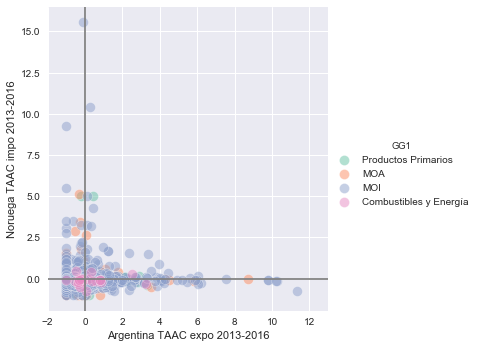

In [59]:
# gráfico que muestra la relación Argentina-Noruega
FG = sns.FacetGrid(TAAC_Matrix, hue = "GG1", palette = "Set2", size = 5, xlim = (-2 , 13))
FG.map(plt.scatter, "Argentina", "Norway", s=100, linewidth=.50, edgecolor="white", alpha = 0.5)
FG.add_legend()
FG.set(xlabel="Argentina TAAC expo 2013-2016", ylabel="Noruega TAAC impo 2013-2016")
plt.axvline(0, color = "gray")
plt.axhline(0, color = "gray");

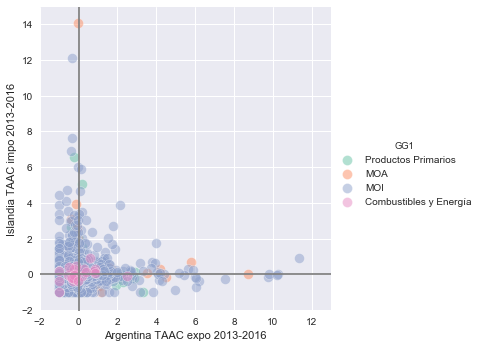

In [60]:
# gráfico que muestra la relación Argentina-Islandia
FG = sns.FacetGrid(TAAC_Matrix, hue = "GG1", palette = "Set2", size = 5, xlim = (-2 , 13))
FG.map(plt.scatter, "Argentina", "Iceland", s=100, linewidth=.50, edgecolor="white", alpha = 0.5)
FG.add_legend()
FG.set(xlabel="Argentina TAAC expo 2013-2016", ylabel="Islandia TAAC impo 2013-2016")
plt.axvline(0, color = "gray")
plt.axhline(0, color = "gray");

## Armado de Listas

Ahora que se que existe un universo de subpartidas que tienen coincidencias en que aumentaron tanto las exportaciones de Argentina al mundo asi como las importaciones del EFTA desde el mundo, tengo que averiguar cuales de esas posiciones tienen agún tipo de arancel y si existe o no comercio específicamente con los miembros del EFTA. Si el arancel es distinto de cero entonces dichos items podrían considerarse en una lista de pedidos a EFTA. Por otro lado si el arancel es cero, pero no hay comercio bilateral, entonces se consideraran para planes de promoción comercial. 

En una primer etapa el análisis se centrará en las oportunidades existentes entre Argentina y Suiza dado que este es el mercado más relevante, luego se extenderá a Noruega e Islandia. 

### Datos de comercio bilateral

Primero hago el join para obtener el dato, por subpartida, de las exportaciones Argentina a cada socio EFTA.

In [61]:
comercio_bilateral = pd.read_excel("comercio_bilateral_ARG_EFTA.xlsx")
expo_AR_MDO = pd.read_csv("X_AR_MDO.csv", encoding = "latin1")
arancelesSUI = pd.read_excel("aranceles_SUI.xlsx")
arancelesNOR = pd.read_excel("aranceles_NOR.xlsx")
arancelesISL = pd.read_excel("aranceles_ISL.xlsx")

In [62]:
comercio_bilateral.dtypes

Nomenclature               object
ReporterISO3               object
ProductCode                 int64
ReporterName               object
PartnerISO3                object
PartnerName                object
Year                        int64
TradeFlowName              object
TradeFlowCode               int64
TradeValue in 1000 USD    float64
dtype: object

In [63]:
comercio_bilateral.columns

Index(['Nomenclature', 'ReporterISO3', 'ProductCode', 'ReporterName',
       'PartnerISO3', 'PartnerName', 'Year', 'TradeFlowName', 'TradeFlowCode',
       'TradeValue in 1000 USD'],
      dtype='object')

Elimino las columnas que no son necesarias y renombro lo que haga falta

In [64]:
comercio_bilateral.drop(columns = ["Nomenclature", "ReporterISO3", "PartnerISO3", "TradeFlowCode"], inplace = True)

In [65]:
comercio_bilateral.rename(columns = {"TradeValue in 1000 USD" : "Value"}, inplace = True) 

In [66]:
comercio_bilateral.head()

,ProductCode,ReporterName,PartnerName,Year,TradeFlowName,Value
0,10129,Argentina,Switzerland,2013,Export,95.00
1,10129,Argentina,Switzerland,2014,Export,165.00
2,10129,Argentina,Switzerland,2015,Export,103.00
3,10129,Argentina,Switzerland,2016,Export,231.00
4,10619,Argentina,Switzerland,2013,Export,0.34


In [67]:
comercio_bilateral.dtypes

ProductCode        int64
ReporterName      object
PartnerName       object
Year               int64
TradeFlowName     object
Value            float64
dtype: object

Corrijo para que ProductCode y Year queden expresados como objects

In [68]:
comercio_bilateral["ProductCode"] = comercio_bilateral["ProductCode"].apply(str)
comercio_bilateral["Year"] = comercio_bilateral["Year"].apply(str)

In [69]:
comercio_bilateral.dtypes

ProductCode       object
ReporterName      object
PartnerName       object
Year              object
TradeFlowName     object
Value            float64
dtype: object

Corrijo para que los codigos de subpartidas queden todos en seis digitos

In [70]:
comercio_bilateral["ProductCode"] = comercio_bilateral["ProductCode"].apply(lambda x : "0" + x if len(x) <= 5 else x)
comercio_bilateral.sample(5)

,ProductCode,ReporterName,PartnerName,Year,TradeFlowName,Value
154,090300,Argentina,Norway,2013,Export,28.835
4285,842123,Argentina,Switzerland,2016,Import,15.724
3630,750522,Argentina,Switzerland,2016,Import,0.098
8373,284690,Brazil,Switzerland,2013,Import,25.475
16757,841231,Brazil,Switzerland,2013,Export,0.114


Creo un nuevo df donde tenga solamente las exportaciones de argentina hacia los socios del EFTA

In [71]:
comercio_bilateral_AR = comercio_bilateral[(comercio_bilateral["ReporterName"] == "Argentina") &
                                                (comercio_bilateral["TradeFlowName"] == "Export")]
comercio_bilateral_AR.head()

,ProductCode,ReporterName,PartnerName,Year,TradeFlowName,Value
0,010129,Argentina,Switzerland,2013,Export,95.00
1,010129,Argentina,Switzerland,2014,Export,165.00
2,010129,Argentina,Switzerland,2015,Export,103.00
3,010129,Argentina,Switzerland,2016,Export,231.00
4,010619,Argentina,Switzerland,2013,Export,0.34


Creo una pivot con las expo promeido 2013-2016 en miles de dólares de argentina a cada socio efta EFTA. Cambios los nombres de las variables para que sean identificados cuando la una con la Matriz de TAAC

In [72]:
Expo_AR_EFTA_Matrix = pd.pivot_table(data = comercio_bilateral_AR, 
                                       values = "Value", 
                                       index = "ProductCode", 
                                       columns = "PartnerName")
Expo_AR_EFTA_Matrix.head()

PartnerName,Iceland,Norway,Switzerland
ProductCode,,,
010129,NaN,NaN,148.500
010619,NaN,0.775,1.015
010632,NaN,NaN,1.100
020130,NaN,1.024,5862.811
020230,NaN,NaN,0.412


In [73]:
Expo_AR_EFTA_Matrix.rename(columns = {"Iceland" : "Expo_AR_ISL_1316", 
                                      "Norway" : "Expo_AR_NOR_1316", 
                                      "Switzerland" : "Expo_AR_SUI_1316"}, inplace = True)
Expo_AR_EFTA_Matrix.head()

PartnerName,Expo_AR_ISL_1316,Expo_AR_NOR_1316,Expo_AR_SUI_1316
ProductCode,,,
010129,NaN,NaN,148.500
010619,NaN,0.775,1.015
010632,NaN,NaN,1.100
020130,NaN,1.024,5862.811
020230,NaN,NaN,0.412


In [74]:
TAAC_Matrix = pd.merge(TAAC_Matrix, Expo_AR_EFTA_Matrix, on = "ProductCode", how = "left")
TAAC_Matrix.head()

,ProductCode,GG1,GG2,Argentina,Brazil,EFTA,Iceland,MERCOSUR,Norway,Paraguay,Switzerland,Uruguay,Expo_AR_ISL_1316,Expo_AR_NOR_1316,Expo_AR_SUI_1316
0,010121,Productos Primarios,Animales vivos,0.196023,0.333619,-0.240670,NaN,0.317001,-0.183047,inf,-0.251496,0.708310,NaN,NaN,NaN
1,010129,Productos Primarios,Animales vivos,0.276762,0.117043,-0.045306,NaN,0.230983,-0.093439,NaN,-0.031222,-0.050244,NaN,NaN,148.5
2,010130,Productos Primarios,Animales vivos,NaN,NaN,0.231680,NaN,NaN,1.475112,NaN,0.148200,NaN,NaN,NaN,NaN
3,010190,Productos Primarios,Animales vivos,NaN,NaN,0.818060,NaN,NaN,NaN,NaN,0.818060,NaN,NaN,NaN,NaN
4,010221,Productos Primarios,Animales vivos,0.271508,-0.588387,0.031997,NaN,0.228409,0.025107,inf,0.032160,1.776244,NaN,NaN,NaN


In [75]:
TAAC_Matrix.describe()

,Argentina,Brazil,EFTA,Iceland,MERCOSUR,Norway,Paraguay,Switzerland,Uruguay,Expo_AR_ISL_1316,Expo_AR_NOR_1316,Expo_AR_SUI_1316
count,3999.000000,4587.000000,5159.000000,4583.000000,4781.000000,4928.000000,1767.000000,5127.000000,2363.000000,22.000000,128.000000,397.000000
mean,inf,inf,inf,inf,inf,inf,inf,inf,inf,88.098364,164.182626,2241.793449
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.120958,592.268651,39466.004023
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.176000,0.003000,0.001000
25%,-0.412528,-0.212258,-0.116414,-0.115203,-0.224395,-0.170031,-0.569811,-0.111939,-0.574745,0.627000,0.439750,0.560000
50%,-0.169999,-0.050887,-0.046187,0.055664,-0.076026,-0.063582,0.092407,-0.039389,-0.024532,2.847500,2.205500,2.826000
75%,0.053790,0.170916,0.021711,0.280588,0.097998,0.043764,inf,0.033287,1.934185,43.935375,27.386750,15.527250
max,inf,inf,inf,inf,inf,inf,inf,inf,inf,817.782750,3500.000000,785032.387500


Reemplazo lo NaN values por cero ya que en este caso indican lo mismo, la inexistencia de comercio entre las partes. Este reemplazo me va a permitir realizar operaciones estadisticas màs adelante. 

In [76]:
#TAAC_Matrix.fillna(value = 0, inplace = True)
#TAAC_Matrix

In [77]:
#TAAC_Matrix.describe()

Limpio y calculo las exportaciones promedio de Argentina al mundo en el periodo 2013-2016

In [78]:
expo_AR_MDO.head()

,Nomenclature,ReporterISO3,ProductCode,ReporterName,PartnerISO3,PartnerName,TradeFlowName,TradeFlowCode,2013 in 1000 USD,2014 in 1000 USD,2015 in 1000 USD,2016 in 1000 USD
0,H4,ARG,10121,Argentina,WLD,World,Export,6,2042.839,2136.042,1492.760,3495.044
1,H4,ARG,10129,Argentina,WLD,World,Export,6,13311.737,17121.944,15062.198,27705.416
2,H4,ARG,10221,Argentina,WLD,World,Export,6,420.343,1169.609,688.815,864.094
3,H4,ARG,10229,Argentina,WLD,World,Export,6,195.505,399.282,41.746,6.512
4,H4,ARG,10392,Argentina,WLD,World,Export,6,NaN,93.190,116.792,23.130


Saco las columnas que no son necesarias.

In [79]:
expo_AR_MDO.drop(columns = ["Nomenclature", 
                            "ReporterName", 
                            "PartnerName", 
                            "ReporterISO3", 
                            "PartnerISO3", 
                            "TradeFlowName", 
                            "TradeFlowCode"], inplace = True)

Verifico que los types de las columnas sean los correctos y hago las correciones que hagan falta.

In [80]:
expo_AR_MDO.dtypes

ProductCode            int64
2013 in 1000 USD     float64
2014 in 1000 USD     float64
2015 in 1000 USD     float64
2016 in 1000 USD     float64
dtype: object

In [81]:
expo_AR_MDO["ProductCode"] = expo_AR_MDO["ProductCode"].astype(str)

In [82]:
expo_AR_MDO.dtypes

ProductCode           object
2013 in 1000 USD     float64
2014 in 1000 USD     float64
2015 in 1000 USD     float64
2016 in 1000 USD     float64
dtype: object

Verifico y modifico el cero faltante en el codigo de las subpartidas

In [83]:
expo_AR_MDO["ProductCode"] = expo_AR_MDO["ProductCode"].apply(lambda x : "0" + x if len(x) <= 5 else x)
expo_AR_MDO.head()

,ProductCode,2013 in 1000 USD,2014 in 1000 USD,2015 in 1000 USD,2016 in 1000 USD
0,010121,2042.839,2136.042,1492.760,3495.044
1,010129,13311.737,17121.944,15062.198,27705.416
2,010221,420.343,1169.609,688.815,864.094
3,010229,195.505,399.282,41.746,6.512
4,010392,NaN,93.190,116.792,23.130


Renombro las columnas por el año correspondiente para que sea más facil de invocarlas.

In [84]:
expo_AR_MDO.columns = ["ProductCode", "2013", "2014", "2015", "2016"]                       

Creo una nueva variable que sea el promedio de las exportaciones de los años 2013-2016 por cada subpartida.

In [85]:
expo_AR_MDO["X_AR_MDO_1316"] = expo_AR_MDO[["2013", "2014", "2015", "2016"]].mean(axis = 1)
expo_AR_MDO.head()

,ProductCode,2013,2014,2015,2016,X_AR_MDO_1316
0,010121,2042.839,2136.042,1492.760,3495.044,2291.67125
1,010129,13311.737,17121.944,15062.198,27705.416,18300.32375
2,010221,420.343,1169.609,688.815,864.094,785.71525
3,010229,195.505,399.282,41.746,6.512,160.76125
4,010392,NaN,93.190,116.792,23.130,77.70400


Finalmente hago el merge con la matriz TAAC para tener identificado por nivel de subpartida cual es el valor promedio 2013-2016 de exportaciones argentinas hacia el mundo. 

In [86]:
TAAC_Matrix = pd.merge(TAAC_Matrix, expo_AR_MDO, on = "ProductCode", how = "left").drop(columns = ["2013", "2014", "2015", "2016"])

In [87]:
TAAC_Matrix.head()

,ProductCode,GG1,GG2,Argentina,Brazil,EFTA,Iceland,MERCOSUR,Norway,Paraguay,Switzerland,Uruguay,Expo_AR_ISL_1316,Expo_AR_NOR_1316,Expo_AR_SUI_1316,X_AR_MDO_1316
0,010121,Productos Primarios,Animales vivos,0.196023,0.333619,-0.240670,NaN,0.317001,-0.183047,inf,-0.251496,0.708310,NaN,NaN,NaN,2291.67125
1,010129,Productos Primarios,Animales vivos,0.276762,0.117043,-0.045306,NaN,0.230983,-0.093439,NaN,-0.031222,-0.050244,NaN,NaN,148.5,18300.32375
2,010130,Productos Primarios,Animales vivos,NaN,NaN,0.231680,NaN,NaN,1.475112,NaN,0.148200,NaN,NaN,NaN,NaN,NaN
3,010190,Productos Primarios,Animales vivos,NaN,NaN,0.818060,NaN,NaN,NaN,NaN,0.818060,NaN,NaN,NaN,NaN,NaN
4,010221,Productos Primarios,Animales vivos,0.271508,-0.588387,0.031997,NaN,0.228409,0.025107,inf,0.032160,1.776244,NaN,NaN,NaN,785.71525


## Aranceles EFTA-Argentina

En esta sección se agregaran los aranceles advalorizados según la metodología de MACMAP. Como se está trabajando a nivel de subpartida el dato del arancel se presentará en promedio simple del correspondiente a nivel de posición arancelaria. 

In [88]:
aranceles_ISL = pd.read_excel("aranceles_ISL.xlsx")
aranceles_NOR = pd.read_excel("aranceles_NOR.xlsx")
aranceles_SUI = pd.read_excel("aranceles_SUI.xlsx")

In [89]:
print (aranceles_ISL.shape, aranceles_NOR.shape, aranceles_SUI.shape)

(8578, 12) (6963, 12) (8299, 12)


In [90]:
print (aranceles_ISL.columns, aranceles_NOR.columns, aranceles_SUI.columns)

Index(['IMPORTER', 'EXPORTER', 'Codigo IS', 'ProductCode', 'PRODUCT_NAME',
       'YEAR', 'NOMENCLATURE', 'TARIFF_REGIME', 'MFN_RATE_AS_REPORTED',
       'MFN_RATE_AS_CONVERTED', 'TOT_AVE', 'TOT_AVE_NUM'],
      dtype='object') Index(['IMPORTER', 'EXPORTER', 'Codigo NO', 'ProductCode', 'PRODUCT_NAME',
       'YEAR', 'NOMENCLATURE', 'TARIFF_REGIME', 'MFN_RATE_AS_REPORTED',
       'MFN_RATE_AS_CONVERTED', 'TOT_AVE', 'TOT_AVE_NUM'],
      dtype='object') Index(['IMPORTER', 'EXPORTER', 'PRODUCT_CODE', 'ProductCode', 'PRODUCT_NAME',
       'YEAR', 'NOMENCLATURE', 'TARIFF_REGIME', 'MFN_RATE_AS_REPORTED',
       'MFN_RATE_AS_CONVERTED', 'TOT_AVE', 'TOT_AVE_NUM'],
      dtype='object')


Dropeo las columnas que ya se que no me van a servir.

In [91]:
aranceles_ISL.drop(columns = ["IMPORTER", 
                             "EXPORTER", 
                             "PRODUCT_NAME", 
                             "NOMENCLATURE", 
                             "MFN_RATE_AS_REPORTED", 
                             "MFN_RATE_AS_CONVERTED"], inplace = True)
aranceles_NOR.drop(columns = ["IMPORTER", 
                             "EXPORTER", 
                             "PRODUCT_NAME", 
                             "NOMENCLATURE", 
                             "MFN_RATE_AS_REPORTED", 
                             "MFN_RATE_AS_CONVERTED"], inplace = True)
aranceles_SUI.drop(columns = ["IMPORTER", 
                             "EXPORTER", 
                             "PRODUCT_NAME", 
                             "NOMENCLATURE", 
                             "MFN_RATE_AS_REPORTED", 
                             "MFN_RATE_AS_CONVERTED"], inplace = True);

In [92]:
print(aranceles_ISL.dtypes); print(aranceles_NOR.dtypes); print(aranceles_SUI.dtypes)

Codigo IS          int64
ProductCode        int64
YEAR               int64
TARIFF_REGIME     object
TOT_AVE          float64
TOT_AVE_NUM      float64
dtype: object
Codigo NO          int64
ProductCode        int64
YEAR               int64
TARIFF_REGIME     object
TOT_AVE          float64
TOT_AVE_NUM      float64
dtype: object
PRODUCT_CODE       int64
ProductCode        int64
YEAR               int64
TARIFF_REGIME     object
TOT_AVE          float64
TOT_AVE_NUM      float64
dtype: object


Casteo las variables a la forma que le corresponden a cada una y luego analizo los datos duplicados. Principalmente quiero ver que el año sea solo 2016 y que hay en "TARIFF_REGIME". 

In [93]:
print(aranceles_ISL.columns); print(aranceles_NOR.columns); print(aranceles_SUI.columns)

Index(['Codigo IS', 'ProductCode', 'YEAR', 'TARIFF_REGIME', 'TOT_AVE',
       'TOT_AVE_NUM'],
      dtype='object')
Index(['Codigo NO', 'ProductCode', 'YEAR', 'TARIFF_REGIME', 'TOT_AVE',
       'TOT_AVE_NUM'],
      dtype='object')
Index(['PRODUCT_CODE', 'ProductCode', 'YEAR', 'TARIFF_REGIME', 'TOT_AVE',
       'TOT_AVE_NUM'],
      dtype='object')


In [94]:
aranceles_ISL["ProductCode"] = aranceles_ISL["ProductCode"].apply(str)
aranceles_ISL["Codigo IS"] = aranceles_ISL["Codigo IS"].apply(str)
aranceles_ISL["YEAR"] = aranceles_ISL["YEAR"].apply(str)
aranceles_NOR["ProductCode"] = aranceles_NOR["ProductCode"].apply(str)
aranceles_NOR["Codigo NO"] = aranceles_NOR["Codigo NO"].apply(str)
aranceles_NOR["YEAR"] = aranceles_NOR["YEAR"].apply(str)
aranceles_SUI["ProductCode"] = aranceles_SUI["ProductCode"].apply(str)
aranceles_SUI["PRODUCT_CODE"] = aranceles_SUI["PRODUCT_CODE"].apply(str)
aranceles_SUI["YEAR"] = aranceles_SUI["YEAR"].apply(str)

In [95]:
print(aranceles_ISL.dtypes); print(aranceles_NOR.dtypes); print(aranceles_SUI.dtypes)

Codigo IS         object
ProductCode       object
YEAR              object
TARIFF_REGIME     object
TOT_AVE          float64
TOT_AVE_NUM      float64
dtype: object
Codigo NO         object
ProductCode       object
YEAR              object
TARIFF_REGIME     object
TOT_AVE          float64
TOT_AVE_NUM      float64
dtype: object
PRODUCT_CODE      object
ProductCode       object
YEAR              object
TARIFF_REGIME     object
TOT_AVE          float64
TOT_AVE_NUM      float64
dtype: object


Arreglo la variable ProductCode para que quede expresada a seis digitos. Me quedo para cada lista solamente con las columnas que me van a servir: Posiciones arancelaria, Product Code, Year (ver que sea solo 2016) y TOT_AVE_NUM (Aranceles advalorizados en %)  

In [96]:
aranceles_ISL["ProductCode"] = aranceles_ISL["ProductCode"].apply(lambda x : "0" + x if len(x) <= 5 else x)
aranceles_ISL["Codigo IS"] = aranceles_ISL["Codigo IS"].apply(lambda x : "0" + x if len(x) <= 7 else x)
aranceles_ISL.sample(5)

,Codigo IS,ProductCode,YEAR,TARIFF_REGIME,TOT_AVE,TOT_AVE_NUM
3492,33021021,330210,2016,MFN duties (Applied),0.1,10.0
579,03049513,030495,2016,MFN duties (Applied),0.0,0.0
5170,60019200,600192,2016,MFN duties (Applied),0.0,0.0
2624,25101000,251010,2016,MFN duties (Applied),0.0,0.0
642,03055109,030551,2016,MFN duties (Applied),0.0,0.0


In [97]:
aranceles_NOR["ProductCode"] = aranceles_NOR["ProductCode"].apply(lambda x : "0" + x if len(x) <= 5 else x)
aranceles_NOR["Codigo NO"] = aranceles_NOR["Codigo NO"].apply(lambda x : "0" + x if len(x) <= 7 else x)
aranceles_NOR.sample(5)

,Codigo NO,ProductCode,YEAR,TARIFF_REGIME,TOT_AVE,TOT_AVE_NUM
4313,72210000,722100,2016,MFN duties (Applied),0.0,0.0
5109,84314940,843149,2016,MFN duties (Applied),0.0,0.0
4729,82029100,820291,2016,MFN duties (Applied),0.0,0.0
4827,83081000,830810,2016,MFN duties (Applied),0.0,0.0
1608,22011000,220110,2016,MFN duties (Applied),0.0,0.0


In [98]:
aranceles_SUI["ProductCode"] = aranceles_SUI["ProductCode"].apply(lambda x : "0" + x if len(x) <= 5 else x)
aranceles_SUI["PRODUCT_CODE"] = aranceles_SUI["PRODUCT_CODE"].apply(lambda x : "0" + x if len(x) <= 7 else x)
aranceles_SUI.sample(5)

,PRODUCT_CODE,ProductCode,YEAR,TARIFF_REGIME,TOT_AVE,TOT_AVE_NUM
2603,28183010,281830,2016,MFN duties (Applied),0.00000,0.000
4321,52062310,520623,2016,MFN duties (Applied),0.04561,4.561
7450,85255000,852550,2016,MFN duties (Applied),0.00177,0.177
5035,62044991,620449,2016,MFN duties (Applied),0.03982,3.982
3757,40151900,401519,2016,MFN duties (Applied),0.03113,3.113


Verifico que los datos de los df sean NMF  y año 2016.

In [99]:
print (aranceles_ISL["TARIFF_REGIME"].unique(), 
       aranceles_NOR["TARIFF_REGIME"].unique(), 
       aranceles_SUI["TARIFF_REGIME"].unique())

['MFN duties (Applied)'] ['MFN duties (Applied)'] ['MFN duties (Applied)']


In [100]:
print (aranceles_ISL["YEAR"].unique(), 
       aranceles_NOR["YEAR"].unique(), 
       aranceles_SUI["YEAR"].unique())

['2016'] ['2016'] ['2016']


### Boxplots de aranceles.



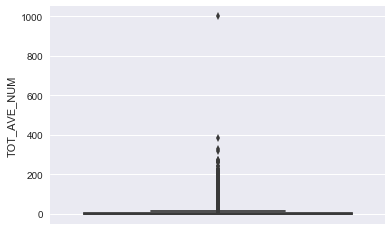

In [102]:
sns.boxplot(x="TOT_AVE_NUM", data=aranceles_ISL, orient='v', color='c') 
plt.show()

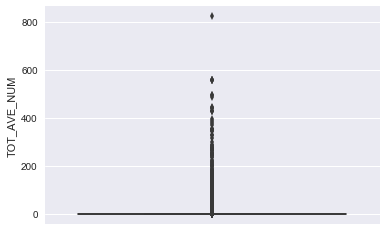

In [137]:
sns.boxplot(x="TOT_AVE_NUM", data=aranceles_NOR, orient='v', color='c') 
plt.show()

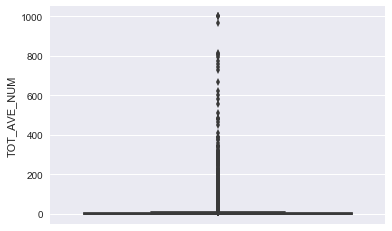

In [136]:
sns.boxplot(x="TOT_AVE_NUM", data=aranceles_SUI, orient='v', color='c') 
plt.show()

Genero tres pivot_tables relacionadas a cada país a nivel de subpartida con el promedio simple de los aranceles por posicion arancelaria. 

In [103]:
aranceles_NOR.loc[aranceles_NOR["ProductCode"] == "010511"]

,Codigo NO,ProductCode,YEAR,TARIFF_REGIME,TOT_AVE,TOT_AVE_NUM
1,01051101,010511,2016,MFN duties (Applied),0.00027,0.027
135,01051109,010511,2016,MFN duties (Applied),3.27000,327.000


In [104]:
aranceles_ISL_subp = pd.pivot_table(data = aranceles_ISL, 
                                   index = "ProductCode",
                                   values = "TOT_AVE_NUM",
                                   aggfunc = "mean")
aranceles_ISL_subp.sample(5)

,TOT_AVE_NUM
ProductCode,
021020,61.2755
900791,0.0000
630491,10.0000
252620,0.0000
251200,0.0000


In [105]:
aranceles_NOR_subp = pd.pivot_table(data = aranceles_NOR, 
                                   index = "ProductCode",
                                   values = "TOT_AVE_NUM",
                                   aggfunc = "mean")
aranceles_NOR_subp.sample(5)

,TOT_AVE_NUM
ProductCode,
030563,0.0
510220,0.0
847751,0.0
551641,0.0
400291,0.0


In [106]:
aranceles_SUI_subp = pd.pivot_table(data = aranceles_SUI, 
                                   index = "ProductCode",
                                   values = "TOT_AVE_NUM",
                                   aggfunc = "mean")
aranceles_SUI_subp.sample(5)

,TOT_AVE_NUM
ProductCode,
280300,0.000
621010,23.849
210111,10.181
550190,0.134
030366,0.000


Ahora tengo que crear un nuevo df que contenga todos los aranceles de los EFTA juntos a partir de las tres PT que tengo con los promedios simples de los aranceles AdValorem. 

In [107]:
aranceles_EFTA_subp = pd.merge(left = aranceles_SUI_subp, 
                               right = aranceles_ISL_subp, 
                               on = "ProductCode", 
                               how = "outer", 
                               suffixes=('_SUI', '_ISL'))
aranceles_EFTA_subp.head()

,TOT_AVE_NUM_SUI,TOT_AVE_NUM_ISL
ProductCode,,
010121,1.3170,0.0
010129,9.1295,0.0
010130,28.1470,0.0
010190,32.5500,0.0
010221,86.1195,0.0


In [108]:
aranceles_EFTA_subp = pd.merge(left = aranceles_EFTA_subp,
                              right = aranceles_NOR_subp,
                              on = "ProductCode",
                              how = "outer")
aranceles_EFTA_subp.head()

,TOT_AVE_NUM_SUI,TOT_AVE_NUM_ISL,TOT_AVE_NUM
ProductCode,,,
010121,1.3170,0.0,0.1970
010129,9.1295,0.0,10.1895
010130,28.1470,0.0,0.0000
010190,32.5500,0.0,0.0000
010221,86.1195,0.0,36.9820


In [109]:
aranceles_EFTA_subp.rename(columns = {"TOT_AVE_NUM_SUI" : "AdValorem_SUI", 
                                      "TOT_AVE_NUM_ISL" : "AdValorem_ISL", 
                                      "TOT_AVE_NUM" : "AdValorem_NOR"}, inplace = True)  
aranceles_EFTA_subp.describe()

,AdValorem_SUI,AdValorem_ISL,AdValorem_NOR
count,5201.000000,5205.000000,5203.000000
mean,6.422913,4.575805,5.937746
std,36.159880,22.582692,33.501559
min,0.000000,0.000000,0.000000
25%,0.076000,0.000000,0.000000
50%,0.756600,0.000000,0.000000
75%,2.815000,0.000000,0.000000
max,1000.000000,1000.000000,822.166000


## Completando la Matriz de TAAC

Una vez que tengo lo aranceles identificados por subpartida como promedio simpe de las lineas arancelarias los agrego a la matriz de TAAC para poder hacer los análisis finales.

In [110]:
TAAC_Matrix = pd.merge(TAAC_Matrix, aranceles_EFTA_subp, how = "left", on = "ProductCode")
TAAC_Matrix.describe()

,Argentina,Brazil,EFTA,Iceland,MERCOSUR,Norway,Paraguay,Switzerland,Uruguay,Expo_AR_ISL_1316,Expo_AR_NOR_1316,Expo_AR_SUI_1316,X_AR_MDO_1316,AdValorem_SUI,AdValorem_ISL,AdValorem_NOR
count,3999.000000,4587.000000,5159.000000,4583.000000,4781.000000,4928.000000,1767.000000,5127.000000,2363.000000,22.000000,128.000000,397.000000,4.195000e+03,5178.000000,5182.000000,5180.000000
mean,inf,inf,inf,inf,inf,inf,inf,inf,inf,88.098364,164.182626,2241.793449,1.511317e+04,6.447126,4.546483,5.815714
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.120958,592.268651,39466.004023,2.070387e+05,36.238049,22.565476,33.068265
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.176000,0.003000,0.001000,1.000000e-03,0.000000,0.000000,0.000000
25%,-0.412528,-0.212258,-0.116414,-0.115203,-0.224395,-0.170031,-0.569811,-0.111939,-0.574745,0.627000,0.439750,0.560000,1.455412e+01,0.079000,0.000000,0.000000
50%,-0.169999,-0.050887,-0.046187,0.055664,-0.076026,-0.063582,0.092407,-0.039389,-0.024532,2.847500,2.205500,2.826000,1.411633e+02,0.761000,0.000000,0.000000
75%,0.053790,0.170916,0.021711,0.280588,0.097998,0.043764,inf,0.033287,1.934185,43.935375,27.386750,15.527250,1.118099e+03,2.815000,0.000000,0.000000
max,inf,inf,inf,inf,inf,inf,inf,inf,inf,817.782750,3500.000000,785032.387500,1.053551e+07,1000.000000,1000.000000,822.166000


Por último agrego el dato de la descripción de cada subpartida para tener un detalle más acabado de cada producto

In [111]:
descripciones = pd.read_excel("HS_Description.xlsx")
descripciones.shape

(15756, 2)

In [112]:
descripciones["ProductCode"] = descripciones["ProductCode"].astype(str)
descripciones["ProductCode"] = descripciones["ProductCode"].apply(lambda x : "0" + x if len(x) <= 5 else x)
descripciones.head()

,ProductCode,Description
0,010110,"Caballos,reproductores de raza pura"
1,010110,"Asno,mulos y burdéganos reproductores de raza ..."
2,010111,"Caballos,reproductores de raza pura"
3,010119,"Caballos,excluido los reproductores de raza pura"
4,010120,"Asnos,mulos y burdéganos"


In [113]:
#TAAC_Matrix = pd.merge(TAAC_Matrix, descripciones, on = "ProductCode", how = "inner")
#TAAC_Matrix.count()

In [114]:
#TAAC_Matrix["Description"].isnull().any()

In [115]:
#TAAC_Matrix[["ProductCode"]].duplicated().head()

# Resultados del trabajo

Primero quiero saber cual es el universo de coincidencias de TAAC entre MERCOSUR y EFTA

In [116]:
TAAC_Matrix.loc[(TAAC_Matrix["MERCOSUR"].notnull()) & (TAAC_Matrix["EFTA"].notnull())].count()

ProductCode         4770
GG1                 4770
GG2                 4770
Argentina           3995
Brazil              4576
EFTA                4770
Iceland             4374
MERCOSUR            4770
Norway              4617
Paraguay            1767
Switzerland         4757
Uruguay             2362
Expo_AR_ISL_1316      22
Expo_AR_NOR_1316     128
Expo_AR_SUI_1316     397
X_AR_MDO_1316       4164
AdValorem_SUI       4770
AdValorem_ISL       4770
AdValorem_NOR       4769
dtype: int64

En el total sigo teniendo las mismas 603 posiciones coincidentes entre MERCOSUR y EFTA

In [117]:
TAAC_Matrix.loc[(TAAC_Matrix["MERCOSUR"] > 0) & (TAAC_Matrix["EFTA"] > 0)].describe()

C:\Users\cjy\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:4406: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


,Argentina,Brazil,EFTA,Iceland,MERCOSUR,Norway,Paraguay,Switzerland,Uruguay,Expo_AR_ISL_1316,Expo_AR_NOR_1316,Expo_AR_SUI_1316,X_AR_MDO_1316,AdValorem_SUI,AdValorem_ISL,AdValorem_NOR
count,458.000000,570.000000,603.000000,532.000000,603.000000,577.000000,193.000000,600.000000,250.000000,1.00,12.000000,54.000000,4.870000e+02,603.000000,603.000000,602.000000
mean,inf,inf,inf,inf,inf,inf,inf,inf,inf,10.12,86.974563,156.075676,7.350115e+03,5.513183,3.950307,4.908703
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253.169496,797.491457,5.832252e+04,36.420803,19.223652,21.745697
min,-1.000000,-1.000000,0.000282,-1.000000,0.000018,-1.000000,-1.000000,-1.000000,-1.000000,10.12,0.505000,0.010000,3.000000e-03,0.000000,0.000000,0.000000
25%,-0.276869,0.072583,0.034587,-0.061762,0.073719,-0.059349,-0.385646,0.027166,-0.553543,10.12,0.991625,0.731812,9.617125e+00,0.018750,0.000000,0.000000
50%,0.020307,0.248411,0.080237,0.104919,0.255000,0.041517,0.440326,0.085948,0.084559,10.12,7.340500,5.916500,8.280000e+01,0.522000,0.000000,0.000000
75%,0.428734,1.117704,0.175164,0.361178,0.928653,0.177433,NaN,0.187206,3.331447,10.12,28.520750,33.927250,5.789269e+02,2.732500,0.000000,0.000000
max,inf,inf,inf,inf,inf,inf,inf,inf,inf,10.12,889.196500,5862.811000,1.026441e+06,811.386000,329.770000,264.785500


## Productos para negociación:

A partir de los datos reunidos se genera una lista, desde la óptica Argentina, para cada país miembro del EFTA donde existan coincidencias entre TAAC positivas de exportaciones ARG-MDO y de importaciones EFTA-MDO, que el arancel vigente por parte de EFTA sea mayor a cero (AdValorizado y promedio simple) y que las exportaciones desde Argentina al mundo hayan sido superiores a USD 10 millones en promedio durante 2013-2016. 

### Lista para negociación con Suiza

In [143]:
neg_SUI = TAAC_Matrix[(TAAC_Matrix["Argentina"] > 0) & 
                      (TAAC_Matrix["Switzerland"] > 0) & 
                      (TAAC_Matrix["AdValorem_SUI"] > 0) &
                      (TAAC_Matrix["X_AR_MDO_1316"] > 1000)].drop(columns = ["Brazil",
                                                                          "EFTA", 
                                                                          "Iceland", 
                                                                          "MERCOSUR", 
                                                                          "Norway", 
                                                                          "Paraguay", 
                                                                          "Uruguay", 
                                                                          "Expo_AR_ISL_1316", 
                                                                          "Expo_AR_NOR_1316",
                                                                          "AdValorem_ISL",
                                                                          "AdValorem_NOR"])
neg_SUI.sort_values(by = ["AdValorem_SUI", "Argentina"], ascending = False).head()

,ProductCode,GG1,GG2,Argentina,Switzerland,Expo_AR_SUI_1316,X_AR_MDO_1316,AdValorem_SUI
52,020442,MOA,Carnes,0.154527,0.121877,NaN,4195.25175,143.186000
64,020690,MOA,Carnes,0.102223,0.166420,NaN,1146.65750,58.290000
668,151521,MOA,Grasas y aceites,0.332993,0.241679,NaN,15927.56550,53.863500
348,070190,Productos Primarios,Hortalizas sin elaborar,0.274528,0.188614,NaN,8907.27475,51.303000
787,200599,MOA,Hortalizas/frutas preparadas,0.017750,0.024823,NaN,2625.60125,43.655857


In [144]:
neg_SUI.shape

(46, 8)

In [165]:
L = ["GG1", "GG2"]
neg_SUI.groupby(L).mean()

Argentina  Switzerland  \
GG1                 GG2                                                        
MOA                 Bebidas, líq. alcohólicos          0.114911     0.173125   
                    Café, té y especias                0.246996     0.269701   
                    Carnes                             0.103108     0.113995   
                    Extractos y tintóreos              0.088366     0.019100   
                    Grasas y aceites                   0.331351     0.135342   
                    Hortalizas/frutas preparadas       0.017750     0.024823   
                    Molinería y sus prod.              0.540977     0.142843   
                    Otros Agropecuarios                0.090256     0.054553   
                    Pieles y cueros                    0.172888     2.471035   
MOI                 Aparatos eléctricos                     inf     0.167907   
                    Aviones y barcos                        inf     0.243932   
                    Manufacturas de metales            0.120034     0.157869   
                    Manufacturas piedra, vidrio, etc   0.209143     0.062041   
                    Otros Industriales                 0.019390     0.090532   
                    Papel, cartón y publicaciones      0.163690     0.121502   
                    Plásticos                          0.090705     0.032964   
                    Químicos                           0.104964     0.163640   
                    Textiles                           0.058362     0.060525   
Productos Primarios Hortalizas sin elaborar            1.048771     0.175876   
                    Semillas oleaginosas               0.210288     0.122182   

                                                      Expo_AR_SUI_1316  \
GG1                 GG2                                                  
MOA                 Bebidas, líq. alcohólicos                      NaN   
                    Café, té y especias                            NaN   
                    Carnes                                         NaN   
                    Extractos y tintóreos                          NaN   
                    Grasas y aceites                               NaN   
                    Hortalizas/frutas preparadas                   NaN   
                    Molinería y sus prod.                          NaN   
                    Otros Agropecuarios                            NaN   
                    Pieles y cueros                                NaN   
MOI                 Aparatos eléctricos                      10.702000   
                    Aviones y barcos                               NaN   
                    Manufacturas de metales                        NaN   
                    Manufacturas piedra, vidrio, etc          0.018000   
                    Otros Industriales                             NaN   
                    Papel, cartón y publicaciones                  NaN   
                    Plásticos                                14.794000   
                    Químicos                                125.534583   
                    Textiles                                  0.571000   
Productos Primarios Hortalizas sin elaborar                        NaN   
                    Semillas oleaginosas                           NaN   

                                                      X_AR_MDO_1316  \
GG1                 GG2                                               
MOA                 Bebidas, líq. alcohólicos          13350.284750   
                    Café, té y especias                 5394.597500   
                    Carnes                              2143.083083   
                    Extractos y tintóreos               3020.291500   
                    Grasas y aceites                   10020.659375   
                    Hortalizas/frutas preparadas        2625.601250   
                    Molinería y sus prod.              63297.893625   
                    Otros

### Lista para negociación con Noruega

In [147]:
neg_NOR = TAAC_Matrix[(TAAC_Matrix["Argentina"] > 0) & 
                      (TAAC_Matrix["Norway"] > 0) & 
                      (TAAC_Matrix["AdValorem_NOR"] > 0) &
                      (TAAC_Matrix["X_AR_MDO_1316"] > 1000)].drop(columns = ["Brazil",
                                                                          "EFTA", 
                                                                          "Iceland", 
                                                                          "MERCOSUR", 
                                                                          "Switzerland", 
                                                                          "Paraguay", 
                                                                          "Uruguay", 
                                                                          "Expo_AR_ISL_1316", 
                                                                          "Expo_AR_SUI_1316",
                                                                          "AdValorem_ISL",
                                                                          "AdValorem_SUI"])
neg_NOR.sort_values(by = ["AdValorem_NOR", "Argentina"], ascending = False).head()

,ProductCode,GG1,GG2,Argentina,Norway,Expo_AR_NOR_1316,X_AR_MDO_1316,AdValorem_NOR
860,230110,MOA,Harinas y pellets,0.055411,0.045818,NaN,17442.35550,822.166000
62,020649,MOA,Carnes,0.054875,inf,NaN,3735.34075,117.083000
850,220710,MOA,"Bebidas, líq. alcohólicos",0.114911,0.457948,NaN,13350.28475,88.984667
565,110811,MOA,Molinería y sus prod.,0.202380,0.060698,NaN,4796.22225,83.768667
868,230330,MOA,Harinas y pellets,0.854091,0.424971,NaN,11651.47175,54.253000


In [148]:
neg_NOR.shape

(19, 8)

In [149]:
neg_NOR.groupby(L).mean()

Argentina    Norway  \
GG1                 GG2                                                 
MOA                 Azúcar y confitería            0.483324  0.153678   
                    Bebidas, líq. alcohólicos      0.147914  0.251649   
                    Carnes                         0.054875       inf   
                    Extractos y tintóreos          0.088366  0.017077   
                    Grasas y aceites               0.141981       inf   
                    Harinas y pellets              0.312532  1.045329   
                    Hortalizas/frutas preparadas   0.067762  0.028422   
                    Molinería y sus prod.          0.428112  0.071018   
Productos Primarios Cereales                       0.046165  0.082375   
                    Frutas frescas                 0.073160  0.147015   
                    Hortalizas sin elaborar        1.590676  0.123948   
                    Semillas oleaginosas           0.444892  5.032735   

                                                  Expo_AR_NOR_1316  \
GG1                 GG2                                              
MOA                 Azúcar y confitería                        NaN   
                    Bebidas, líq. alcohólicos                  NaN   
                    Carnes                                     NaN   
                    Extractos y tintóreos                      NaN   
                    Grasas y aceites                           NaN   
                    Harinas y pellets                          NaN   
                    Hortalizas/frutas preparadas        2624.55725   
                    Molinería y sus prod.                      NaN   
Productos Primarios Cereales                                   NaN   
                    Frutas frescas                       889.19650   
                    Hortalizas sin elaborar               10.35000   
                    Semillas oleaginosas                       NaN   

                                                  X_AR_MDO_1316  AdValorem_NOR  
GG1                 GG2                                                         
MOA                 Azúcar y confitería            56127.315250       9.698000  
                    Bebidas, líq. alcohólicos      21657.090000      49.398533  
                    Carnes                          3735.340750     117.083000  
                    Extractos y tintóreos           3020.291500       0.103000  
                    Grasas y aceites               81892.401250      12.190000  
                    Harinas y pellets              36674.735333     293.034000  
                    Hortalizas/frutas preparadas  219865.866250       6.225500  
                    Molinería y sus prod.          43797.336500      48.408722  
Productos Primarios Cereales                       18595.512000      18.981500  
                    Frutas frescas                219391.562250       6.132000  
                    Hortalizas sin elaborar        28116.885000      11.155000  
                    Semillas oleaginosas            2790.997500      15.205500

### Lista para negociación con Islandia

In [151]:
neg_ISL = TAAC_Matrix[(TAAC_Matrix["Argentina"] > 0) & 
                      (TAAC_Matrix["Iceland"] > 0) & 
                      (TAAC_Matrix["AdValorem_ISL"] > 0) &
                      (TAAC_Matrix["X_AR_MDO_1316"] > 1000)].drop(columns = ["Brazil",
                                                                          "EFTA", 
                                                                          "Norway", 
                                                                          "MERCOSUR", 
                                                                          "Switzerland", 
                                                                          "Paraguay", 
                                                                          "Uruguay", 
                                                                          "Expo_AR_NOR_1316", 
                                                                          "Expo_AR_SUI_1316",
                                                                          "AdValorem_NOR",
                                                                          "AdValorem_SUI"])
neg_ISL.sort_values(by = ["AdValorem_ISL", "Argentina"], ascending = False).head()

,ProductCode,GG1,GG2,Argentina,Iceland,Expo_AR_ISL_1316,X_AR_MDO_1316,AdValorem_ISL
39,020230,MOA,Carnes,0.088695,0.420408,NaN,365670.54775,109.865600
686,160232,MOA,Carnes,0.020982,0.033415,NaN,10708.91825,105.476667
52,020442,MOA,Carnes,0.154527,inf,NaN,4195.25175,72.398000
303,040640,MOA,Lácteos y huevos,0.180032,0.101718,NaN,5760.13950,55.798000
546,110220,MOA,Molinería y sus prod.,0.305802,0.168856,NaN,2460.72050,27.500000


In [152]:
neg_ISL.shape

(26, 8)

In [153]:
neg_ISL.groupby(L).mean()

Argentina   Iceland  \
GG1                 GG2                                                     
MOA                 Bebidas, líq. alcohólicos          0.180918  0.068813   
                    Carnes                             0.088068       inf   
                    Lácteos y huevos                   0.180032  0.101718   
                    Molinería y sus prod.              0.386413  0.121599   
                    Otros Agropecuarios                0.209067  0.125638   
                    Pescados elaborados                0.091190  0.164588   
                    Pieles y cueros                    0.074516  0.018747   
MOI                 Caucho y prod.                     0.051720  0.097224   
                    Manufacturas de cuero              0.043817  0.079621   
                    Manufacturas de metales            0.168999  0.141329   
                    Manufacturas piedra, vidrio, etc   0.050913  0.146513   
                    Otros Industriales                 0.077656  0.126824   
                    Plásticos                          0.266950  0.085345   
                    Químicos                           0.060405  0.145636   
Productos Primarios Hortalizas sin elaborar            0.046681  0.113246   
                    Pescados sin elaborar              0.055107  0.170983   

                                                      Expo_AR_ISL_1316  \
GG1                 GG2                                                  
MOA                 Bebidas, líq. alcohólicos                      NaN   
                    Carnes                                         NaN   
                    Lácteos y huevos                               NaN   
                    Molinería y sus prod.                          NaN   
                    Otros Agropecuarios                            NaN   
                    Pescados elaborados                            NaN   
                    Pieles y cueros                                NaN   
MOI                 Caucho y prod.                                 NaN   
                    Manufacturas de cuero                          NaN   
                    Manufacturas de metales                        NaN   
                    Manufacturas piedra, vidrio, etc               NaN   
                    Otros Industriales                             NaN   
                    Plásticos                                      NaN   
                    Químicos                                       NaN   
Productos Primarios Hortalizas sin elaborar                        NaN   
                    Pescados sin elaborar                          NaN   

                                                      X_AR_MDO_1316  \
GG1                 GG2                                               
MOA                 Bebidas, líq. alcohólicos          29963.895250   
                    Carnes                            126858.239250   
                    Lácteos y huevos                    5760.139500   
                    Molinería y sus prod.              63757.306625   
                    Otros Agropecuarios                 3284.935250   
                    Pescados elaborados                 3321.813250   
                    Pieles y cueros                    97417.074750   
MOI                 Caucho y prod.                     20002.996625   
                    Manufacturas de cuero               3991.577750   
                    Manufacturas de metales             8789.133875   
                    Manufacturas piedra, vidrio, etc    1189.603750   
                    Otros Industriales                  3933.211500   
                    Plásticos                           8668.378000   
                    Químicos                          112577.673850   
Productos Primarios Hortalizas sin elaborar            61863.499375   
                    Pescados sin elaborar              51770.305500   

                                                      A

Exporto las listas de subpartidas a csv

In [166]:
neg_ISL.to_excel("neg_ISL.xlsx")
neg_NOR.to_excel("neg_NOR.xlsx")
neg_SUI.to_excel("neg_SUI.xlsx")

## Productos para Promoción Comercial

A partir de los datos reunidos se genera una lista, desde la óptica Argentina, para cada país miembro del EFTA donde se cumplan las siguientes condiciones:
* existan coincidencias entre TAAC positivas de exportaciones ARG-MDO y de importaciones EFTA-MDO; 
* que el arancel vigente por parte de EFTA sea mayor a cero (AdValorizado y promedio simple) y que 
* las exportaciones desde Argentina al mundo hayan sido superiores a USD 10 millones en promedio durante 2013-2016. 

### Lista de promoción para Suiza

In [125]:
prom_SUI = TAAC_Matrix[(TAAC_Matrix["Argentina"] > 0) & 
                       (TAAC_Matrix["Switzerland"] > 0) & 
                       (TAAC_Matrix["AdValorem_SUI"] == 0) &
                       (TAAC_Matrix["X_AR_MDO_1316"] > 10000) &
                       (TAAC_Matrix["Expo_AR_SUI_1316"].isnull())].drop(columns = ["Brazil",
                                                                                  "EFTA", 
                                                                                  "Norway", 
                                                                                  "MERCOSUR", 
                                                                                  "Iceland", 
                                                                                  "Paraguay", 
                                                                                  "Uruguay", 
                                                                                  "Expo_AR_NOR_1316", 
                                                                                  "Expo_AR_ISL_1316",
                                                                                  "AdValorem_NOR",
                                                                                  "AdValorem_ISL"])
prom_SUI.sort_values(by = "X_AR_MDO_1316", ascending = False)

,ProductCode,GG1,GG2,Argentina,Switzerland,Expo_AR_SUI_1316,X_AR_MDO_1316,AdValorem_SUI
182,030383,Productos Primarios,Pescados sin elaborar,0.188455,1.684074,NaN,52126.18150,0.0
264,030729,Productos Primarios,Pescados sin elaborar,0.055107,0.082356,NaN,51770.30550,0.0
1779,381700,MOI,Químicos,0.008786,0.022418,NaN,25420.74225,0.0
969,260800,Productos Primarios,"Minerales metalíferos, cenizas",0.156579,0.131081,NaN,22848.28175,0.0


In [141]:
prom_SUI.shape

(4, 8)

In [127]:
prom_SUI.groupby(L).mean()

Argentina  Switzerland  \
GG1                 GG2                                                      
MOI                 Químicos                         0.008786     0.022418   
Productos Primarios Minerales metalíferos, cenizas   0.156579     0.131081   
                    Pescados sin elaborar            0.121781     0.883215   

                                                    Expo_AR_SUI_1316  \
GG1                 GG2                                                
MOI                 Químicos                                     NaN   
Productos Primarios Minerales metalíferos, cenizas               NaN   
                    Pescados sin elaborar                        NaN   

                                                    X_AR_MDO_1316  \
GG1                 GG2                                             
MOI                 Químicos                          25420.74225   
Productos Primarios Minerales metalíferos, cenizas    22848.28175   
                    Pescados sin elaborar             51948.24350   

                                                    AdValorem_SUI  
GG1                 GG2                                            
MOI                 Químicos                                  0.0  
Productos Primarios Minerales metalíferos, cenizas            0.0  
                    Pescados sin elaborar                     0.0

### Lista de promoción para Noruega

In [128]:
prom_NOR = TAAC_Matrix[(TAAC_Matrix["Argentina"] > 0) & 
                       (TAAC_Matrix["Norway"] > 0) & 
                       (TAAC_Matrix["AdValorem_NOR"] == 0) &
                       (TAAC_Matrix["X_AR_MDO_1316"] > 10000) &
                       (TAAC_Matrix["Expo_AR_NOR_1316"].isnull())].drop(columns = ["Brazil",
                                                                                  "EFTA", 
                                                                                  "Switzerland", 
                                                                                  "MERCOSUR", 
                                                                                  "Iceland", 
                                                                                  "Paraguay", 
                                                                                  "Uruguay", 
                                                                                  "Expo_AR_SUI_1316", 
                                                                                  "Expo_AR_ISL_1316",
                                                                                  "AdValorem_SUI",
                                                                                  "AdValorem_ISL"])
prom_NOR.sort_values(by = "X_AR_MDO_1316", ascending = False)

,ProductCode,GG1,GG2,Argentina,Norway,Expo_AR_NOR_1316,X_AR_MDO_1316,AdValorem_NOR
3336,710812,MOI,Piedras y metales preciosos,0.034532,0.460741,NaN,1.995545e+06,0.0
1815,382600,MOI,Químicos,0.055066,0.246632,NaN,1.026441e+06,0.0
884,240120,Productos Primarios,Tabaco sin elaborar,0.055766,inf,NaN,2.750063e+05,0.0
400,071333,Productos Primarios,Hortalizas sin elaborar,0.452770,0.326586,NaN,2.459479e+05,0.0
1632,330113,MOI,Químicos,0.020556,1.189687,NaN,1.727690e+05,0.0
811,200939,MOA,Hortalizas/frutas preparadas,0.092833,0.212126,NaN,1.558642e+05,0.0
351,070320,Productos Primarios,Hortalizas sin elaborar,0.058380,0.021343,NaN,1.223113e+05,0.0
1500,293719,MOI,Químicos,0.155733,0.097338,NaN,7.959121e+04,0.0
2039,410449,MOA,Pieles y cueros,0.015720,0.161252,NaN,7.945892e+04,0.0
1158,283691,MOI,Químicos,0.563247,0.102180,NaN,7.813810e+04,0.0


In [129]:
prom_NOR["GG1"].count()

21

In [130]:
prom_NOR.groupby(L).mean()

Argentina    Norway  \
GG1                 GG2                                                   
MOA                 Hortalizas/frutas preparadas     0.092833  0.212126   
                    Otros Agropecuarios              0.013826  0.011479   
                    Pieles y cueros                  0.015720  0.161252   
MOI                 Aviones y barcos                 0.328661  3.168522   
                    Piedras y metales preciosos      0.034532  0.460741   
                    Plásticos                        0.076387  0.038461   
                    Químicos                         0.159099  0.759964   
Productos Primarios Fibra de algodón                 0.189579  0.203148   
                    Hortalizas sin elaborar          0.416785  0.237097   
                    Minerales metalíferos, cenizas   0.156579  0.103343   
                    Pescados sin elaborar            0.055107  0.037984   
                    Tabaco sin elaborar              0.055766       inf   

                                                    Expo_AR_NOR_1316  \
GG1                 GG2                                                
MOA                 Hortalizas/frutas preparadas                 NaN   
                    Otros Agropecuarios                          NaN   
                    Pieles y cueros                              NaN   
MOI                 Aviones y barcos                             NaN   
                    Piedras y metales preciosos                  NaN   
                    Plásticos                                    NaN   
                    Químicos                                     NaN   
Productos Primarios Fibra de algodón                             NaN   
                    Hortalizas sin elaborar                      NaN   
                    Minerales metalíferos, cenizas               NaN   
                    Pescados sin elaborar                        NaN   
                    Tabaco sin elaborar                          NaN   

                                                    X_AR_MDO_1316  \
GG1                 GG2                                             
MOA                 Hortalizas/frutas preparadas     1.558642e+05   
                    Otros Agropecuarios              1.001593e+04   
                    Pieles y cueros                  7.945892e+04   
MOI                 Aviones y barcos                 2.481140e+04   
                    Piedras y metales preciosos      1.995545e+06   
                    Plásticos                        2.129804e+04   
                    Químicos                         1.940920e+05   
Productos Primarios Fibra de algodón                 6.876094e+04   
                    Hortalizas sin elaborar          1.273632e+05   
                    Minerales metalíferos, cenizas   2.284828e+04   
                    Pescados sin elaborar            5.177031e+04   
                    Tabaco sin elaborar              2.750063e+05   

                                                    AdValorem_NOR  
GG1                 GG2                                            
MOA                 Hortalizas/frutas preparadas              0.0  
                    Otros Agropecuarios                       0.0  
                    Pieles y cueros                           0.0  
MOI                 Aviones y barcos                          0.0  
                    Piedras y metales preciosos               0.0  
                    Plásticos                                 0.0  
                    Químicos                                  0.0  
Productos Primarios Fibra de algodón                          0.0  
                    Hortalizas sin elaborar                   0.0  
                    Minerales metalíferos, cenizas            0.0  
                    Pescados sin elaborar                     0.0  
                    Tabaco sin elaborar                       0.0

### Lista de promoción para Islandia

In [131]:
prom_ISL = TAAC_Matrix[(TAAC_Matrix["Argentina"] > 0) & 
                       (TAAC_Matrix["Iceland"] > 0) & 
                       (TAAC_Matrix["AdValorem_ISL"] == 0) &
                       (TAAC_Matrix["X_AR_MDO_1316"] > 10000) &
                       (TAAC_Matrix["Expo_AR_ISL_1316"].isnull())].drop(columns = ["Brazil",
                                                                                "EFTA", 
                                                                                  "Norway", 
                                                                                  "MERCOSUR", 
                                                                                  "Switzerland", 
                                                                                  "Paraguay", 
                                                                                  "Uruguay", 
                                                                                  "Expo_AR_NOR_1316", 
                                                                                  "Expo_AR_SUI_1316",
                                                                                  "AdValorem_NOR",
                                                                                  "AdValorem_SUI"])
prom_ISL.sort_values(by = "X_AR_MDO_1316", ascending = False)

,ProductCode,GG1,GG2,Argentina,Iceland,Expo_AR_ISL_1316,X_AR_MDO_1316,AdValorem_ISL
3336,710812,MOI,Piedras y metales preciosos,0.034532,0.127529,NaN,1.995545e+06,0.0
1815,382600,MOI,Químicos,0.055066,0.489068,NaN,1.026441e+06,0.0
4735,870333,MOI,Vehículos terrestre,0.029952,0.281981,NaN,3.655807e+05,0.0
3724,760110,MOI,Manufacturas de metales,0.005570,0.747518,NaN,2.863453e+05,0.0
576,120242,Productos Primarios,Semillas oleaginosas,0.106047,0.261843,NaN,2.612685e+05,0.0
400,071333,Productos Primarios,Hortalizas sin elaborar,0.452770,0.212488,NaN,2.459479e+05,0.0
1632,330113,MOI,Químicos,0.020556,0.763958,NaN,1.727690e+05,0.0
1819,390190,MOI,Plásticos,0.063565,0.012931,NaN,1.404513e+05,0.0
1817,390120,MOI,Plásticos,0.055985,0.039212,NaN,1.224321e+05,0.0
581,120600,Productos Primarios,Semillas oleaginosas,0.056164,0.041510,NaN,1.149461e+05,0.0


In [132]:
prom_ISL["GG1"].count()

30

In [170]:
prom_ISL[["GG1", "GG2", "ProductCode"]].groupby(L).count()

ProductCode
GG1                 GG2                                     
MOA                 Bebidas, líq. alcohólicos              1
                    Grasas y aceites                       1
                    Pescados elaborados                    2
MOI                 Aparatos eléctricos                    1
                    Aviones y barcos                       1
                    Manufacturas de metales                1
                    Otros Industriales                     1
                    Piedras y metales preciosos            1
                    Plásticos                              5
                    Químicos                               7
                    Vehículos terrestre                    1
Productos Primarios Frutas frescas                         2
                    Hortalizas sin elaborar                2
                    Lanas sucias                           1
                    Semillas oleaginosas                   3

In [134]:
prom_ISL.groupby(L).mean()

Argentina   Iceland  \
GG1                 GG2                                                
MOA                 Bebidas, líq. alcohólicos     0.114911  0.782281   
                    Grasas y aceites              0.141981  0.075544   
                    Pescados elaborados           0.054400  0.616533   
MOI                 Aparatos eléctricos           0.191870  0.216747   
                    Aviones y barcos              0.328661  0.003816   
                    Manufacturas de metales       0.005570  0.747518   
                    Otros Industriales            0.018361  0.157454   
                    Piedras y metales preciosos   0.034532  0.127529   
                    Plásticos                     0.090452  0.083962   
                    Químicos                      0.169697  0.348285   
                    Vehículos terrestre           0.029952  0.281981   
Productos Primarios Frutas frescas                0.325844  0.640888   
                    Hortalizas sin elaborar       0.363370  0.114672   
                    Lanas sucias                  0.284348       inf   
                    Semillas oleaginosas          0.106504  0.132996   

                                                 Expo_AR_ISL_1316  \
GG1                 GG2                                             
MOA                 Bebidas, líq. alcohólicos                 NaN   
                    Grasas y aceites                          NaN   
                    Pescados elaborados                       NaN   
MOI                 Aparatos eléctricos                       NaN   
                    Aviones y barcos                          NaN   
                    Manufacturas de metales                   NaN   
                    Otros Industriales                        NaN   
                    Piedras y metales preciosos               NaN   
                    Plásticos                                 NaN   
                    Químicos                                  NaN   
                    Vehículos terrestre                       NaN   
Productos Primarios Frutas frescas                            NaN   
                    Hortalizas sin elaborar                   NaN   
                    Lanas sucias                              NaN   
                    Semillas oleaginosas                      NaN   

                                                 X_AR_MDO_1316  AdValorem_ISL  
GG1                 GG2                                                        
MOA                 Bebidas, líq. alcohólicos     1.335028e+04            0.0  
                    Grasas y aceites              8.189240e+04            0.0  
                    Pescados elaborados           1.870825e+04            0.0  
MOI                 Aparatos eléctricos           2.335871e+04            0.0  
                    Aviones y barcos              2.481140e+04            0.0  
                    Manufacturas de metales       2.863453e+05            0.0  
                    Otros Industriales            3.395756e+04            0.0  
                    Piedras y metales preciosos   1.995545e+06            0.0  
                    Plásticos                     7.552792e+04            0.0  
                    Químicos                      1.875190e+05            0.0  
                    Vehículos terrestre           3.655807e+05            0.0  
Productos Primarios Frutas frescas                5.925428e+04            0.0  
                    Hortalizas sin elaborar       1.501854e+05            0.0  
                    Lanas sucias                  5.625438e+04            0.0  
                    Semillas oleaginosas          1.309470e+05            0.0